In [5]:
from clustering import *
from downloaddata import *
from portfolio_and_performance import *
from trees import *
import cPickle as pickle
import matlab.engine

-3.3306690738754696e-16

In [19]:
window = 100
space = 10
thresh = 95
filename = "SP500_from_1985.csv"
enddate='2017-06-28'
startdate='1985-01-04'

In [16]:
price = importdata("data/WRDS/SP500_price_1985.csv").replace(0,np.nan).ffill()
ret = importdata("data/WRDS/SP500_ret_1985.csv").fillna(0)
div = importdata("data/WRDS/SP500_div_1985.csv").fillna(0)
cpr = importdata("data/WRDS/SP500_cpr_1985.csv").replace(0,np.nan).ffill()

In [15]:
logret = np.log(price) - np.log(price.shift(1))
logret = logret.iloc[1:]

NameError: name 'price' is not defined

In [72]:
D = corr_matrix(ret, thresh, window=1000, enddate="1985-04-08", method="gower", shrinkage="None")

In [73]:
D

""


In [70]:
S = 2-(D**2/2)

In [77]:
S

,10145,10516,11308,11404,11674,11703,11762,11850,12052,12060,...,68591,69550,70578,71563,72726,73139,76639,77730,79637,84129
10145,1.000000,0.244569,0.364179,0.185189,0.128264,0.476869,0.231988,0.287079,0.397626,0.420374,...,0.173520,0.108562,0.189019,0.053721,0.175615,0.180690,-0.004763,0.120129,0.183406,0.095005
10516,0.244569,1.000000,0.230865,0.221799,0.175360,0.278306,0.254411,0.158595,0.184113,0.323604,...,0.081481,0.117124,0.059421,-0.077181,0.130298,0.121905,0.026770,0.041460,0.073810,0.182873
11308,0.364179,0.230865,1.000000,0.344328,0.142119,0.512017,0.272812,0.266629,0.275918,0.585470,...,0.001797,0.071724,0.237873,-0.004030,0.175427,0.084889,0.009534,0.099747,0.185107,0.132892
11404,0.185189,0.221799,0.344328,1.000000,0.179639,0.267869,0.141923,0.272757,0.210795,0.256171,...,0.040143,0.074968,0.060909,0.029426,-0.013781,0.031394,0.016234,0.112494,0.180672,0.058401
11674,0.128264,0.175360,0.142119,0.179639,1.000000,0.241001,0.165653,0.057448,0.245549,0.148368,...,-0.023988,0.060178,0.074657,0.050274,0.131322,0.109699,-0.033644,0.056814,0.177051,-0.010201
11703,0.476869,0.278306,0.512017,0.267869,0.241001,1.000000,0.229663,0.378482,0.337512,0.507087,...,0.080063,0.149704,0.182222,-0.039850,0.162488,0.172019,0.138181,0.139517,0.260498,0.143310
11762,0.231988,0.254411,0.272812,0.141923,0.165653,0.229663,1.000000,0.165580,0.215249,0.372224,...,0.045583,0.159847,0.263873,-0.102634,0.151383,0.138550,0.028708,0.157921,0.132385,0.243318
11850,0.287079,0.158595,0.266629,0.272757,0.057448,0.378482,0.165580,1.000000,0.216991,0.246353,...,0.153427,0.142193,0.099228,-0.046286,0.037328,0.086448,0.092647,0.051096,0.101580,0.071136
12052,0.397626,0.184113,0.275918,0.210795,0.245549,0.337512,0.215249,0.216991,1.000000,0.414624,...,0.147280,0.071510,0.196447,-0.015811,0.103120,0.204701,0.063024,-0.009528,0.217041,0.069660
12060,0.420374,0.323604,0.585470,0.256171,0.148368,0.507087,0.372224,0.246353,0.414624,1.000000,...,0.116930,0.073428,0.245137,-0.026750,0.165135,0.122015,0.007476,0.150138,0.187536,0.135928


In [16]:
import matlab.engine
eng = matlab.engine.start_matlab()

In [66]:
D = matlab.double(D.as_matrix().tolist())
S = matlab.double(S.as_matrix().tolist())

In [25]:
import numpy as np
import matlab.engine
eng = matlab.engine.start_matlab()
#eng.cd(r'C:\Users\RockLIANG\Desktop') #set up matlab wdir to where the matlab scripts are located

In [25]:
eng.cd(r'MATLAB')

'/home/xuxiao2695/PycharmProjects/clustering'

In [18]:
def DBHT(thresh, filename="SP100_prices.csv", window=250, enddate="2017-01-24", startdate='2015-12-30', space=1,
         shrinkage="None"):
    """Returns a dictionary of Minimum Spanning Tree for each end date,
    space means the interval between two sample updates"""
    ret = importdata(filename)
    dic = rolling_corr(ret, thresh, window, enddate, startdate, space, shrinkage=shrinkage)
    clusterings = {}
    PMFG = {}
    bubble_cluster_membership = {}
    PMFG_shortest_path_length_matrix = {}
    bubble_membership_mattrix = {}
    DBHT_hierarchy = {}
    eng = matlab.engine.start_matlab()
    eng.cd(r'MATLAB')
    count = 0
    for key in sorted(dic.keys()):
        count+=1
        D = dic[key]
        S = 2-(D**2/2)
        D = matlab.double(D.as_matrix().tolist())
        S = matlab.double(S.as_matrix().tolist())
        T8, Rpm, Adjv, Dpm, Mv, Z = eng.DBHTs(D, S, nargout=6)
        clusterings[key] = T8
        PMFG[key] = Rpm
        bubble_cluster_membership[key] = Adjv
        PMFG_shortest_path_length_matrix[key] = Dpm
        bubble_membership_mattrix[key] = Mv
        DBHT_hierarchy[key] = Z
        print "building DBHT for the number "+ str(count) + " date " + key + " done."
    return {'DBHT_clusterings': clusterings, 'PMFG': PMFG,
            'bubble_cluster_membership_matrix': bubble_membership_mattrix,
            'PMFG_shortest_paath_length_matrix': PMFG_shortest_path_length_matrix,
            'bubble_membership_matrix': bubble_membership_mattrix,
            'DBHT_hierarchy': DBHT_hierarchy}

In [40]:
dic = rolling_corr(logret, thresh, window, enddate='2016-12-30', startdate='1985-01-02', space=10, shrinkage='None')

corr_matrix for 2016-12-30 done.
corr_matrix for 2016-12-15 done.
corr_matrix for 2016-12-01 done.
corr_matrix for 2016-11-16 done.
corr_matrix for 2016-11-02 done.
corr_matrix for 2016-10-19 done.
corr_matrix for 2016-10-05 done.
corr_matrix for 2016-09-21 done.
corr_matrix for 2016-09-07 done.
corr_matrix for 2016-08-23 done.
corr_matrix for 2016-08-09 done.
corr_matrix for 2016-07-26 done.
corr_matrix for 2016-07-12 done.
corr_matrix for 2016-06-27 done.
corr_matrix for 2016-06-13 done.
corr_matrix for 2016-05-27 done.
corr_matrix for 2016-05-13 done.
corr_matrix for 2016-04-29 done.
corr_matrix for 2016-04-15 done.


corr_matrix for 2016-04-01 done.
corr_matrix for 2016-03-17 done.
corr_matrix for 2016-03-03 done.
corr_matrix for 2016-02-18 done.
corr_matrix for 2016-02-03 done.
corr_matrix for 2016-01-20 done.
corr_matrix for 2016-01-05 done.
corr_matrix for 2015-12-18 done.
corr_matrix for 2015-12-04 done.
corr_matrix for 2015-11-19 done.
corr_matrix for 2015-11-05 done.
corr_matrix for 2015-10-22 done.
corr_matrix for 2015-10-08 done.
corr_matrix for 2015-09-24 done.
corr_matrix for 2015-09-10 done.
corr_matrix for 2015-08-26 done.
corr_matrix for 2015-08-12 done.
corr_matrix for 2015-07-29 done.
corr_matrix for 2015-07-15 done.


corr_matrix for 2015-06-30 done.
corr_matrix for 2015-06-16 done.
corr_matrix for 2015-06-02 done.
corr_matrix for 2015-05-18 done.
corr_matrix for 2015-05-04 done.
corr_matrix for 2015-04-20 done.
corr_matrix for 2015-04-06 done.
corr_matrix for 2015-03-20 done.
corr_matrix for 2015-03-06 done.
corr_matrix for 2015-02-20 done.
corr_matrix for 2015-02-05 done.
corr_matrix for 2015-01-22 done.
corr_matrix for 2015-01-07 done.
corr_matrix for 2014-12-22 done.
corr_matrix for 2014-12-08 done.
corr_matrix for 2014-11-21 done.
corr_matrix for 2014-11-07 done.
corr_matrix for 2014-10-24 done.
corr_matrix for 2014-10-10 done.


corr_matrix for 2014-09-26 done.
corr_matrix for 2014-09-12 done.
corr_matrix for 2014-08-28 done.
corr_matrix for 2014-08-14 done.
corr_matrix for 2014-07-31 done.
corr_matrix for 2014-07-17 done.
corr_matrix for 2014-07-02 done.
corr_matrix for 2014-06-18 done.
corr_matrix for 2014-06-04 done.
corr_matrix for 2014-05-20 done.
corr_matrix for 2014-05-06 done.
corr_matrix for 2014-04-22 done.
corr_matrix for 2014-04-07 done.
corr_matrix for 2014-03-24 done.
corr_matrix for 2014-03-10 done.
corr_matrix for 2014-02-24 done.
corr_matrix for 2014-02-07 done.
corr_matrix for 2014-01-24 done.
corr_matrix for 2014-01-09 done.


corr_matrix for 2013-12-24 done.
corr_matrix for 2013-12-10 done.
corr_matrix for 2013-11-25 done.
corr_matrix for 2013-11-11 done.
corr_matrix for 2013-10-28 done.
corr_matrix for 2013-10-14 done.
corr_matrix for 2013-09-30 done.
corr_matrix for 2013-09-16 done.
corr_matrix for 2013-08-30 done.
corr_matrix for 2013-08-16 done.
corr_matrix for 2013-08-02 done.
corr_matrix for 2013-07-19 done.
corr_matrix for 2013-07-05 done.
corr_matrix for 2013-06-20 done.
corr_matrix for 2013-06-06 done.
corr_matrix for 2013-05-22 done.
corr_matrix for 2013-05-08 done.
corr_matrix for 2013-04-24 done.
corr_matrix for 2013-04-10 done.


corr_matrix for 2013-03-26 done.
corr_matrix for 2013-03-12 done.
corr_matrix for 2013-02-26 done.
corr_matrix for 2013-02-11 done.
corr_matrix for 2013-01-28 done.
corr_matrix for 2013-01-11 done.
corr_matrix for 2012-12-27 done.
corr_matrix for 2012-12-12 done.
corr_matrix for 2012-11-28 done.
corr_matrix for 2012-11-13 done.
corr_matrix for 2012-10-26 done.
corr_matrix for 2012-10-12 done.
corr_matrix for 2012-09-28 done.
corr_matrix for 2012-09-14 done.
corr_matrix for 2012-08-30 done.
corr_matrix for 2012-08-16 done.
corr_matrix for 2012-08-02 done.
corr_matrix for 2012-07-19 done.
corr_matrix for 2012-07-05 done.


corr_matrix for 2012-06-20 done.
corr_matrix for 2012-06-06 done.
corr_matrix for 2012-05-22 done.
corr_matrix for 2012-05-08 done.
corr_matrix for 2012-04-24 done.
corr_matrix for 2012-04-10 done.
corr_matrix for 2012-03-26 done.
corr_matrix for 2012-03-12 done.
corr_matrix for 2012-02-27 done.
corr_matrix for 2012-02-10 done.
corr_matrix for 2012-01-27 done.
corr_matrix for 2012-01-12 done.
corr_matrix for 2011-12-28 done.
corr_matrix for 2011-12-13 done.
corr_matrix for 2011-11-29 done.
corr_matrix for 2011-11-14 done.
corr_matrix for 2011-10-31 done.
corr_matrix for 2011-10-17 done.
corr_matrix for 2011-10-03 done.


corr_matrix for 2011-09-19 done.
corr_matrix for 2011-09-02 done.
corr_matrix for 2011-08-19 done.
corr_matrix for 2011-08-05 done.
corr_matrix for 2011-07-22 done.
corr_matrix for 2011-07-08 done.
corr_matrix for 2011-06-23 done.
corr_matrix for 2011-06-09 done.
corr_matrix for 2011-05-25 done.
corr_matrix for 2011-05-11 done.
corr_matrix for 2011-04-27 done.
corr_matrix for 2011-04-12 done.
corr_matrix for 2011-03-29 done.
corr_matrix for 2011-03-15 done.
corr_matrix for 2011-03-01 done.
corr_matrix for 2011-02-14 done.
corr_matrix for 2011-01-31 done.
corr_matrix for 2011-01-14 done.
corr_matrix for 2010-12-31 done.


corr_matrix for 2010-12-16 done.
corr_matrix for 2010-12-02 done.
corr_matrix for 2010-11-17 done.
corr_matrix for 2010-11-03 done.
corr_matrix for 2010-10-20 done.
corr_matrix for 2010-10-06 done.
corr_matrix for 2010-09-22 done.
corr_matrix for 2010-09-08 done.
corr_matrix for 2010-08-24 done.
corr_matrix for 2010-08-10 done.
corr_matrix for 2010-07-27 done.
corr_matrix for 2010-07-13 done.
corr_matrix for 2010-06-28 done.
corr_matrix for 2010-06-14 done.
corr_matrix for 2010-05-28 done.
corr_matrix for 2010-05-14 done.
corr_matrix for 2010-04-30 done.
corr_matrix for 2010-04-16 done.


corr_matrix for 2010-04-01 done.
corr_matrix for 2010-03-18 done.
corr_matrix for 2010-03-04 done.
corr_matrix for 2010-02-18 done.
corr_matrix for 2010-02-03 done.
corr_matrix for 2010-01-20 done.
corr_matrix for 2010-01-05 done.
corr_matrix for 2009-12-18 done.
corr_matrix for 2009-12-04 done.
corr_matrix for 2009-11-19 done.
corr_matrix for 2009-11-05 done.
corr_matrix for 2009-10-22 done.
corr_matrix for 2009-10-08 done.
corr_matrix for 2009-09-24 done.
corr_matrix for 2009-09-10 done.
corr_matrix for 2009-08-26 done.
corr_matrix for 2009-08-12 done.


corr_matrix for 2009-07-29 done.
corr_matrix for 2009-07-15 done.
corr_matrix for 2009-06-30 done.
corr_matrix for 2009-06-16 done.
corr_matrix for 2009-06-02 done.
corr_matrix for 2009-05-18 done.
corr_matrix for 2009-05-04 done.
corr_matrix for 2009-04-20 done.
corr_matrix for 2009-04-03 done.
corr_matrix for 2009-03-20 done.
corr_matrix for 2009-03-06 done.
corr_matrix for 2009-02-20 done.
corr_matrix for 2009-02-05 done.
corr_matrix for 2009-01-22 done.
corr_matrix for 2009-01-07 done.
corr_matrix for 2008-12-22 done.
corr_matrix for 2008-12-08 done.
corr_matrix for 2008-11-21 done.
corr_matrix for 2008-11-07 done.


corr_matrix for 2008-10-24 done.
corr_matrix for 2008-10-10 done.
corr_matrix for 2008-09-26 done.
corr_matrix for 2008-09-12 done.
corr_matrix for 2008-08-28 done.
corr_matrix for 2008-08-14 done.
corr_matrix for 2008-07-31 done.
corr_matrix for 2008-07-17 done.
corr_matrix for 2008-07-02 done.
corr_matrix for 2008-06-18 done.
corr_matrix for 2008-06-04 done.
corr_matrix for 2008-05-20 done.
corr_matrix for 2008-05-06 done.
corr_matrix for 2008-04-22 done.
corr_matrix for 2008-04-08 done.
corr_matrix for 2008-03-25 done.
corr_matrix for 2008-03-10 done.
corr_matrix for 2008-02-25 done.
corr_matrix for 2008-02-08 done.


corr_matrix for 2008-01-25 done.
corr_matrix for 2008-01-10 done.
corr_matrix for 2007-12-26 done.
corr_matrix for 2007-12-11 done.
corr_matrix for 2007-11-27 done.
corr_matrix for 2007-11-12 done.
corr_matrix for 2007-10-29 done.
corr_matrix for 2007-10-15 done.
corr_matrix for 2007-10-01 done.
corr_matrix for 2007-09-17 done.
corr_matrix for 2007-08-31 done.
corr_matrix for 2007-08-17 done.
corr_matrix for 2007-08-03 done.
corr_matrix for 2007-07-20 done.
corr_matrix for 2007-07-06 done.
corr_matrix for 2007-06-21 done.
corr_matrix for 2007-06-07 done.
corr_matrix for 2007-05-23 done.
corr_matrix for 2007-05-09 done.


corr_matrix for 2007-04-25 done.
corr_matrix for 2007-04-11 done.
corr_matrix for 2007-03-27 done.
corr_matrix for 2007-03-13 done.
corr_matrix for 2007-02-27 done.
corr_matrix for 2007-02-12 done.
corr_matrix for 2007-01-29 done.
corr_matrix for 2007-01-12 done.
corr_matrix for 2006-12-27 done.
corr_matrix for 2006-12-12 done.
corr_matrix for 2006-11-28 done.
corr_matrix for 2006-11-13 done.
corr_matrix for 2006-10-30 done.
corr_matrix for 2006-10-16 done.
corr_matrix for 2006-10-02 done.
corr_matrix for 2006-09-18 done.
corr_matrix for 2006-09-01 done.
corr_matrix for 2006-08-18 done.
corr_matrix for 2006-08-04 done.


corr_matrix for 2006-07-21 done.
corr_matrix for 2006-07-07 done.
corr_matrix for 2006-06-22 done.
corr_matrix for 2006-06-08 done.
corr_matrix for 2006-05-24 done.
corr_matrix for 2006-05-10 done.
corr_matrix for 2006-04-26 done.
corr_matrix for 2006-04-11 done.
corr_matrix for 2006-03-28 done.
corr_matrix for 2006-03-14 done.
corr_matrix for 2006-02-28 done.
corr_matrix for 2006-02-13 done.
corr_matrix for 2006-01-30 done.
corr_matrix for 2006-01-13 done.
corr_matrix for 2005-12-29 done.
corr_matrix for 2005-12-14 done.
corr_matrix for 2005-11-30 done.
corr_matrix for 2005-11-15 done.
corr_matrix for 2005-11-01 done.


corr_matrix for 2005-10-18 done.
corr_matrix for 2005-10-04 done.
corr_matrix for 2005-09-20 done.
corr_matrix for 2005-09-06 done.
corr_matrix for 2005-08-22 done.
corr_matrix for 2005-08-08 done.
corr_matrix for 2005-07-25 done.
corr_matrix for 2005-07-11 done.
corr_matrix for 2005-06-24 done.
corr_matrix for 2005-06-10 done.
corr_matrix for 2005-05-26 done.
corr_matrix for 2005-05-12 done.
corr_matrix for 2005-04-28 done.
corr_matrix for 2005-04-14 done.
corr_matrix for 2005-03-31 done.
corr_matrix for 2005-03-16 done.
corr_matrix for 2005-03-02 done.
corr_matrix for 2005-02-15 done.


corr_matrix for 2005-02-01 done.
corr_matrix for 2005-01-18 done.
corr_matrix for 2005-01-03 done.
corr_matrix for 2004-12-17 done.
corr_matrix for 2004-12-03 done.
corr_matrix for 2004-11-18 done.
corr_matrix for 2004-11-04 done.
corr_matrix for 2004-10-21 done.
corr_matrix for 2004-10-07 done.
corr_matrix for 2004-09-23 done.
corr_matrix for 2004-09-09 done.
corr_matrix for 2004-08-25 done.
corr_matrix for 2004-08-11 done.
corr_matrix for 2004-07-28 done.
corr_matrix for 2004-07-14 done.
corr_matrix for 2004-06-29 done.
corr_matrix for 2004-06-15 done.
corr_matrix for 2004-05-28 done.
corr_matrix for 2004-05-14 done.


corr_matrix for 2004-04-30 done.
corr_matrix for 2004-04-16 done.
corr_matrix for 2004-04-01 done.
corr_matrix for 2004-03-18 done.
corr_matrix for 2004-03-04 done.
corr_matrix for 2004-02-19 done.
corr_matrix for 2004-02-04 done.
corr_matrix for 2004-01-21 done.
corr_matrix for 2004-01-06 done.
corr_matrix for 2003-12-19 done.
corr_matrix for 2003-12-05 done.
corr_matrix for 2003-11-20 done.
corr_matrix for 2003-11-06 done.
corr_matrix for 2003-10-23 done.
corr_matrix for 2003-10-09 done.
corr_matrix for 2003-09-25 done.
corr_matrix for 2003-09-11 done.
corr_matrix for 2003-08-27 done.
corr_matrix for 2003-08-13 done.


corr_matrix for 2003-07-30 done.
corr_matrix for 2003-07-16 done.
corr_matrix for 2003-07-01 done.
corr_matrix for 2003-06-17 done.
corr_matrix for 2003-06-03 done.
corr_matrix for 2003-05-19 done.
corr_matrix for 2003-05-05 done.
corr_matrix for 2003-04-21 done.
corr_matrix for 2003-04-04 done.
corr_matrix for 2003-03-21 done.
corr_matrix for 2003-03-07 done.
corr_matrix for 2003-02-21 done.
corr_matrix for 2003-02-06 done.
corr_matrix for 2003-01-23 done.
corr_matrix for 2003-01-08 done.
corr_matrix for 2002-12-23 done.
corr_matrix for 2002-12-09 done.
corr_matrix for 2002-11-22 done.


corr_matrix for 2002-11-08 done.
corr_matrix for 2002-10-25 done.
corr_matrix for 2002-10-11 done.
corr_matrix for 2002-09-27 done.
corr_matrix for 2002-09-13 done.
corr_matrix for 2002-08-29 done.
corr_matrix for 2002-08-15 done.
corr_matrix for 2002-08-01 done.
corr_matrix for 2002-07-18 done.
corr_matrix for 2002-07-03 done.
corr_matrix for 2002-06-19 done.
corr_matrix for 2002-06-05 done.
corr_matrix for 2002-05-21 done.
corr_matrix for 2002-05-07 done.
corr_matrix for 2002-04-23 done.
corr_matrix for 2002-04-09 done.
corr_matrix for 2002-03-25 done.


corr_matrix for 2002-03-11 done.
corr_matrix for 2002-02-25 done.
corr_matrix for 2002-02-08 done.
corr_matrix for 2002-01-25 done.
corr_matrix for 2002-01-10 done.
corr_matrix for 2001-12-26 done.
corr_matrix for 2001-12-11 done.
corr_matrix for 2001-11-27 done.
corr_matrix for 2001-11-12 done.
corr_matrix for 2001-10-29 done.
corr_matrix for 2001-10-15 done.
corr_matrix for 2001-10-01 done.
corr_matrix for 2001-09-17 done.
corr_matrix for 2001-08-27 done.
corr_matrix for 2001-08-13 done.
corr_matrix for 2001-07-30 done.
corr_matrix for 2001-07-16 done.
corr_matrix for 2001-06-29 done.
corr_matrix for 2001-06-15 done.


corr_matrix for 2001-06-01 done.
corr_matrix for 2001-05-17 done.
corr_matrix for 2001-05-03 done.
corr_matrix for 2001-04-19 done.
corr_matrix for 2001-04-04 done.
corr_matrix for 2001-03-21 done.
corr_matrix for 2001-03-07 done.
corr_matrix for 2001-02-21 done.
corr_matrix for 2001-02-06 done.
corr_matrix for 2001-01-23 done.
corr_matrix for 2001-01-08 done.
corr_matrix for 2000-12-21 done.
corr_matrix for 2000-12-07 done.
corr_matrix for 2000-11-22 done.
corr_matrix for 2000-11-08 done.
corr_matrix for 2000-10-25 done.
corr_matrix for 2000-10-11 done.


corr_matrix for 2000-09-27 done.
corr_matrix for 2000-09-13 done.
corr_matrix for 2000-08-29 done.
corr_matrix for 2000-08-15 done.
corr_matrix for 2000-08-01 done.
corr_matrix for 2000-07-18 done.
corr_matrix for 2000-07-03 done.
corr_matrix for 2000-06-19 done.
corr_matrix for 2000-06-05 done.
corr_matrix for 2000-05-19 done.
corr_matrix for 2000-05-05 done.
corr_matrix for 2000-04-20 done.
corr_matrix for 2000-04-06 done.
corr_matrix for 2000-03-23 done.
corr_matrix for 2000-03-09 done.
corr_matrix for 2000-02-24 done.
corr_matrix for 2000-02-09 done.
corr_matrix for 2000-01-26 done.
corr_matrix for 2000-01-11 done.


corr_matrix for 1999-12-28 done.
corr_matrix for 1999-12-13 done.
corr_matrix for 1999-11-29 done.
corr_matrix for 1999-11-12 done.
corr_matrix for 1999-10-29 done.
corr_matrix for 1999-10-15 done.
corr_matrix for 1999-10-01 done.
corr_matrix for 1999-09-17 done.
corr_matrix for 1999-09-02 done.
corr_matrix for 1999-08-19 done.
corr_matrix for 1999-08-05 done.
corr_matrix for 1999-07-22 done.
corr_matrix for 1999-07-08 done.
corr_matrix for 1999-06-23 done.
corr_matrix for 1999-06-09 done.
corr_matrix for 1999-05-25 done.
corr_matrix for 1999-05-11 done.
corr_matrix for 1999-04-27 done.
corr_matrix for 1999-04-13 done.


corr_matrix for 1999-03-29 done.
corr_matrix for 1999-03-15 done.
corr_matrix for 1999-03-01 done.
corr_matrix for 1999-02-12 done.
corr_matrix for 1999-01-29 done.
corr_matrix for 1999-01-14 done.
corr_matrix for 1998-12-30 done.
corr_matrix for 1998-12-15 done.
corr_matrix for 1998-12-01 done.
corr_matrix for 1998-11-16 done.
corr_matrix for 1998-11-02 done.
corr_matrix for 1998-10-19 done.
corr_matrix for 1998-10-05 done.
corr_matrix for 1998-09-21 done.
corr_matrix for 1998-09-04 done.
corr_matrix for 1998-08-21 done.
corr_matrix for 1998-08-07 done.
corr_matrix for 1998-07-24 done.
corr_matrix for 1998-07-10 done.


corr_matrix for 1998-06-25 done.
corr_matrix for 1998-06-11 done.
corr_matrix for 1998-05-28 done.
corr_matrix for 1998-05-13 done.
corr_matrix for 1998-04-29 done.
corr_matrix for 1998-04-15 done.
corr_matrix for 1998-03-31 done.
corr_matrix for 1998-03-17 done.
corr_matrix for 1998-03-03 done.
corr_matrix for 1998-02-17 done.
corr_matrix for 1998-02-02 done.
corr_matrix for 1998-01-16 done.
corr_matrix for 1998-01-02 done.
corr_matrix for 1997-12-17 done.
corr_matrix for 1997-12-03 done.
corr_matrix for 1997-11-18 done.
corr_matrix for 1997-11-04 done.
corr_matrix for 1997-10-21 done.


corr_matrix for 1997-10-07 done.
corr_matrix for 1997-09-23 done.
corr_matrix for 1997-09-09 done.
corr_matrix for 1997-08-25 done.
corr_matrix for 1997-08-11 done.
corr_matrix for 1997-07-28 done.
corr_matrix for 1997-07-14 done.
corr_matrix for 1997-06-27 done.
corr_matrix for 1997-06-13 done.
corr_matrix for 1997-05-30 done.
corr_matrix for 1997-05-15 done.
corr_matrix for 1997-05-01 done.
corr_matrix for 1997-04-17 done.
corr_matrix for 1997-04-03 done.
corr_matrix for 1997-03-19 done.
corr_matrix for 1997-03-05 done.
corr_matrix for 1997-02-19 done.
corr_matrix for 1997-02-04 done.
corr_matrix for 1997-01-21 done.


corr_matrix for 1997-01-07 done.
corr_matrix for 1996-12-20 done.
corr_matrix for 1996-12-06 done.
corr_matrix for 1996-11-21 done.
corr_matrix for 1996-11-07 done.
corr_matrix for 1996-10-24 done.
corr_matrix for 1996-10-10 done.
corr_matrix for 1996-09-26 done.
corr_matrix for 1996-09-12 done.
corr_matrix for 1996-08-28 done.
corr_matrix for 1996-08-14 done.
corr_matrix for 1996-07-31 done.
corr_matrix for 1996-07-17 done.
corr_matrix for 1996-07-02 done.
corr_matrix for 1996-06-18 done.
corr_matrix for 1996-06-04 done.
corr_matrix for 1996-05-20 done.
corr_matrix for 1996-05-06 done.
corr_matrix for 1996-04-22 done.


corr_matrix for 1996-04-08 done.
corr_matrix for 1996-03-22 done.
corr_matrix for 1996-03-08 done.
corr_matrix for 1996-02-23 done.
corr_matrix for 1996-02-08 done.
corr_matrix for 1996-01-25 done.
corr_matrix for 1996-01-11 done.
corr_matrix for 1995-12-27 done.
corr_matrix for 1995-12-12 done.
corr_matrix for 1995-11-28 done.
corr_matrix for 1995-11-13 done.
corr_matrix for 1995-10-30 done.
corr_matrix for 1995-10-16 done.
corr_matrix for 1995-10-02 done.
corr_matrix for 1995-09-18 done.
corr_matrix for 1995-09-01 done.
corr_matrix for 1995-08-18 done.
corr_matrix for 1995-08-04 done.


corr_matrix for 1995-07-21 done.
corr_matrix for 1995-07-07 done.
corr_matrix for 1995-06-22 done.
corr_matrix for 1995-06-08 done.
corr_matrix for 1995-05-24 done.
corr_matrix for 1995-05-10 done.
corr_matrix for 1995-04-26 done.
corr_matrix for 1995-04-11 done.
corr_matrix for 1995-03-28 done.
corr_matrix for 1995-03-14 done.
corr_matrix for 1995-02-28 done.
corr_matrix for 1995-02-13 done.
corr_matrix for 1995-01-30 done.
corr_matrix for 1995-01-16 done.
corr_matrix for 1994-12-30 done.
corr_matrix for 1994-12-15 done.
corr_matrix for 1994-12-01 done.
corr_matrix for 1994-11-16 done.
corr_matrix for 1994-11-02 done.


corr_matrix for 1994-10-19 done.
corr_matrix for 1994-10-05 done.
corr_matrix for 1994-09-21 done.
corr_matrix for 1994-09-07 done.
corr_matrix for 1994-08-23 done.
corr_matrix for 1994-08-09 done.
corr_matrix for 1994-07-26 done.
corr_matrix for 1994-07-12 done.
corr_matrix for 1994-06-27 done.
corr_matrix for 1994-06-13 done.
corr_matrix for 1994-05-27 done.
corr_matrix for 1994-05-13 done.
corr_matrix for 1994-04-29 done.
corr_matrix for 1994-04-14 done.
corr_matrix for 1994-03-30 done.
corr_matrix for 1994-03-16 done.
corr_matrix for 1994-03-02 done.
corr_matrix for 1994-02-15 done.
corr_matrix for 1994-02-01 done.


corr_matrix for 1994-01-18 done.
corr_matrix for 1994-01-04 done.
corr_matrix for 1993-12-20 done.
corr_matrix for 1993-12-06 done.
corr_matrix for 1993-11-19 done.
corr_matrix for 1993-11-05 done.
corr_matrix for 1993-10-22 done.
corr_matrix for 1993-10-08 done.
corr_matrix for 1993-09-24 done.
corr_matrix for 1993-09-10 done.
corr_matrix for 1993-08-26 done.
corr_matrix for 1993-08-12 done.
corr_matrix for 1993-07-29 done.
corr_matrix for 1993-07-15 done.
corr_matrix for 1993-06-30 done.
corr_matrix for 1993-06-16 done.
corr_matrix for 1993-06-02 done.
corr_matrix for 1993-05-18 done.
corr_matrix for 1993-05-04 done.


corr_matrix for 1993-04-20 done.
corr_matrix for 1993-04-05 done.
corr_matrix for 1993-03-22 done.
corr_matrix for 1993-03-08 done.
corr_matrix for 1993-02-22 done.
corr_matrix for 1993-02-05 done.
corr_matrix for 1993-01-22 done.
corr_matrix for 1993-01-08 done.
corr_matrix for 1992-12-23 done.
corr_matrix for 1992-12-09 done.
corr_matrix for 1992-11-24 done.
corr_matrix for 1992-11-10 done.
corr_matrix for 1992-10-27 done.
corr_matrix for 1992-10-13 done.
corr_matrix for 1992-09-29 done.
corr_matrix for 1992-09-15 done.
corr_matrix for 1992-08-31 done.
corr_matrix for 1992-08-17 done.
corr_matrix for 1992-08-03 done.


corr_matrix for 1992-07-20 done.
corr_matrix for 1992-07-06 done.
corr_matrix for 1992-06-19 done.
corr_matrix for 1992-06-05 done.
corr_matrix for 1992-05-21 done.
corr_matrix for 1992-05-07 done.
corr_matrix for 1992-04-23 done.
corr_matrix for 1992-04-08 done.
corr_matrix for 1992-03-25 done.
corr_matrix for 1992-03-11 done.
corr_matrix for 1992-02-26 done.
corr_matrix for 1992-02-11 done.
corr_matrix for 1992-01-28 done.
corr_matrix for 1992-01-14 done.
corr_matrix for 1991-12-30 done.
corr_matrix for 1991-12-13 done.
corr_matrix for 1991-11-29 done.
corr_matrix for 1991-11-14 done.
corr_matrix for 1991-10-31 done.


corr_matrix for 1991-10-17 done.
corr_matrix for 1991-10-03 done.
corr_matrix for 1991-09-19 done.
corr_matrix for 1991-09-05 done.
corr_matrix for 1991-08-21 done.
corr_matrix for 1991-08-07 done.
corr_matrix for 1991-07-24 done.
corr_matrix for 1991-07-10 done.
corr_matrix for 1991-06-25 done.
corr_matrix for 1991-06-11 done.
corr_matrix for 1991-05-28 done.
corr_matrix for 1991-05-13 done.
corr_matrix for 1991-04-29 done.
corr_matrix for 1991-04-15 done.
corr_matrix for 1991-04-01 done.
corr_matrix for 1991-03-15 done.
corr_matrix for 1991-03-01 done.
corr_matrix for 1991-02-14 done.


corr_matrix for 1991-01-31 done.
corr_matrix for 1991-01-17 done.
corr_matrix for 1991-01-03 done.
corr_matrix for 1990-12-18 done.
corr_matrix for 1990-12-04 done.
corr_matrix for 1990-11-19 done.
corr_matrix for 1990-11-05 done.
corr_matrix for 1990-10-22 done.
corr_matrix for 1990-10-08 done.
corr_matrix for 1990-09-24 done.
corr_matrix for 1990-09-10 done.
corr_matrix for 1990-08-24 done.
corr_matrix for 1990-08-10 done.
corr_matrix for 1990-07-27 done.
corr_matrix for 1990-07-13 done.
corr_matrix for 1990-06-28 done.
corr_matrix for 1990-06-14 done.
corr_matrix for 1990-05-31 done.


corr_matrix for 1990-05-16 done.
corr_matrix for 1990-05-02 done.
corr_matrix for 1990-04-18 done.
corr_matrix for 1990-04-03 done.
corr_matrix for 1990-03-20 done.
corr_matrix for 1990-03-06 done.
corr_matrix for 1990-02-20 done.
corr_matrix for 1990-02-05 done.
corr_matrix for 1990-01-22 done.
corr_matrix for 1990-01-08 done.
corr_matrix for 1989-12-21 done.
corr_matrix for 1989-12-07 done.
corr_matrix for 1989-11-22 done.
corr_matrix for 1989-11-08 done.
corr_matrix for 1989-10-25 done.
corr_matrix for 1989-10-11 done.
corr_matrix for 1989-09-27 done.
corr_matrix for 1989-09-13 done.
corr_matrix for 1989-08-29 done.


corr_matrix for 1989-08-15 done.
corr_matrix for 1989-08-01 done.
corr_matrix for 1989-07-18 done.
corr_matrix for 1989-07-03 done.
corr_matrix for 1989-06-19 done.
corr_matrix for 1989-06-05 done.
corr_matrix for 1989-05-19 done.
corr_matrix for 1989-05-05 done.
corr_matrix for 1989-04-21 done.
corr_matrix for 1989-04-07 done.
corr_matrix for 1989-03-23 done.
corr_matrix for 1989-03-09 done.
corr_matrix for 1989-02-23 done.
corr_matrix for 1989-02-08 done.
corr_matrix for 1989-01-25 done.
corr_matrix for 1989-01-11 done.
corr_matrix for 1988-12-27 done.
corr_matrix for 1988-12-12 done.
corr_matrix for 1988-11-28 done.


corr_matrix for 1988-11-11 done.
corr_matrix for 1988-10-28 done.
corr_matrix for 1988-10-14 done.
corr_matrix for 1988-09-30 done.
corr_matrix for 1988-09-16 done.
corr_matrix for 1988-09-01 done.
corr_matrix for 1988-08-18 done.
corr_matrix for 1988-08-04 done.
corr_matrix for 1988-07-21 done.
corr_matrix for 1988-07-07 done.
corr_matrix for 1988-06-22 done.
corr_matrix for 1988-06-08 done.
corr_matrix for 1988-05-24 done.
corr_matrix for 1988-05-10 done.
corr_matrix for 1988-04-26 done.
corr_matrix for 1988-04-12 done.
corr_matrix for 1988-03-28 done.
corr_matrix for 1988-03-14 done.
corr_matrix for 1988-02-29 done.


corr_matrix for 1988-02-12 done.
corr_matrix for 1988-01-29 done.
corr_matrix for 1988-01-15 done.
corr_matrix for 1987-12-31 done.
corr_matrix for 1987-12-16 done.
corr_matrix for 1987-12-02 done.
corr_matrix for 1987-11-17 done.
corr_matrix for 1987-11-03 done.
corr_matrix for 1987-10-20 done.
corr_matrix for 1987-10-06 done.
corr_matrix for 1987-09-22 done.
corr_matrix for 1987-09-08 done.
corr_matrix for 1987-08-24 done.
corr_matrix for 1987-08-10 done.
corr_matrix for 1987-07-27 done.
corr_matrix for 1987-07-13 done.
corr_matrix for 1987-06-26 done.
corr_matrix for 1987-06-12 done.
corr_matrix for 1987-05-29 done.


corr_matrix for 1987-05-14 done.
corr_matrix for 1987-04-30 done.
corr_matrix for 1987-04-15 done.
corr_matrix for 1987-04-01 done.
corr_matrix for 1987-03-18 done.
corr_matrix for 1987-03-04 done.
corr_matrix for 1987-02-18 done.
corr_matrix for 1987-02-03 done.
corr_matrix for 1987-01-20 done.
corr_matrix for 1987-01-06 done.
corr_matrix for 1986-12-19 done.
corr_matrix for 1986-12-05 done.
corr_matrix for 1986-11-20 done.
corr_matrix for 1986-11-06 done.
corr_matrix for 1986-10-23 done.
corr_matrix for 1986-10-09 done.
corr_matrix for 1986-09-25 done.
corr_matrix for 1986-09-11 done.
corr_matrix for 1986-08-27 done.


corr_matrix for 1986-08-13 done.
corr_matrix for 1986-07-30 done.
corr_matrix for 1986-07-16 done.
corr_matrix for 1986-07-01 done.
corr_matrix for 1986-06-17 done.
corr_matrix for 1986-06-03 done.
corr_matrix for 1986-05-19 done.
corr_matrix for 1986-05-05 done.
corr_matrix for 1986-04-21 done.
corr_matrix for 1986-04-07 done.
corr_matrix for 1986-03-21 done.
corr_matrix for 1986-03-07 done.
corr_matrix for 1986-02-21 done.
corr_matrix for 1986-02-06 done.
corr_matrix for 1986-01-23 done.
corr_matrix for 1986-01-09 done.


corr_matrix for 1985-12-24 done.
corr_matrix for 1985-12-10 done.
corr_matrix for 1985-11-25 done.
corr_matrix for 1985-11-11 done.
corr_matrix for 1985-10-28 done.
corr_matrix for 1985-10-14 done.
corr_matrix for 1985-09-30 done.
corr_matrix for 1985-09-13 done.
corr_matrix for 1985-08-29 done.
corr_matrix for 1985-08-15 done.
corr_matrix for 1985-08-01 done.
corr_matrix for 1985-07-18 done.
corr_matrix for 1985-07-03 done.
corr_matrix for 1985-06-19 done.
corr_matrix for 1985-06-05 done.
corr_matrix for 1985-05-21 done.
corr_matrix for 1985-05-07 done.
corr_matrix for 1985-04-23 done.


corr_matrix for 1985-04-09 done.
corr_matrix for 1985-03-25 done.
corr_matrix for 1985-03-11 done.
corr_matrix for 1985-02-25 done.
corr_matrix for 1985-02-08 done.
corr_matrix for 1985-01-25 done.
corr_matrix for 1985-01-11 done.


In [42]:
sorteddates = sorted(dic.keys(), key=lambda d: map(int, d.split('-')))

In [46]:
np.mean(np.mean(1 - (dic[sorteddates[0]] ** 2 / 2)))

0.13866860359628097

In [54]:
average_correlation = {}
for t in sorteddates:
    average_correlation[t] = np.mean(np.mean(1 - (dic[t] ** 2 / 2)))

In [55]:
average_correlation = pd.DataFrame.from_dict(average_correlation,orient='index').sort_index()

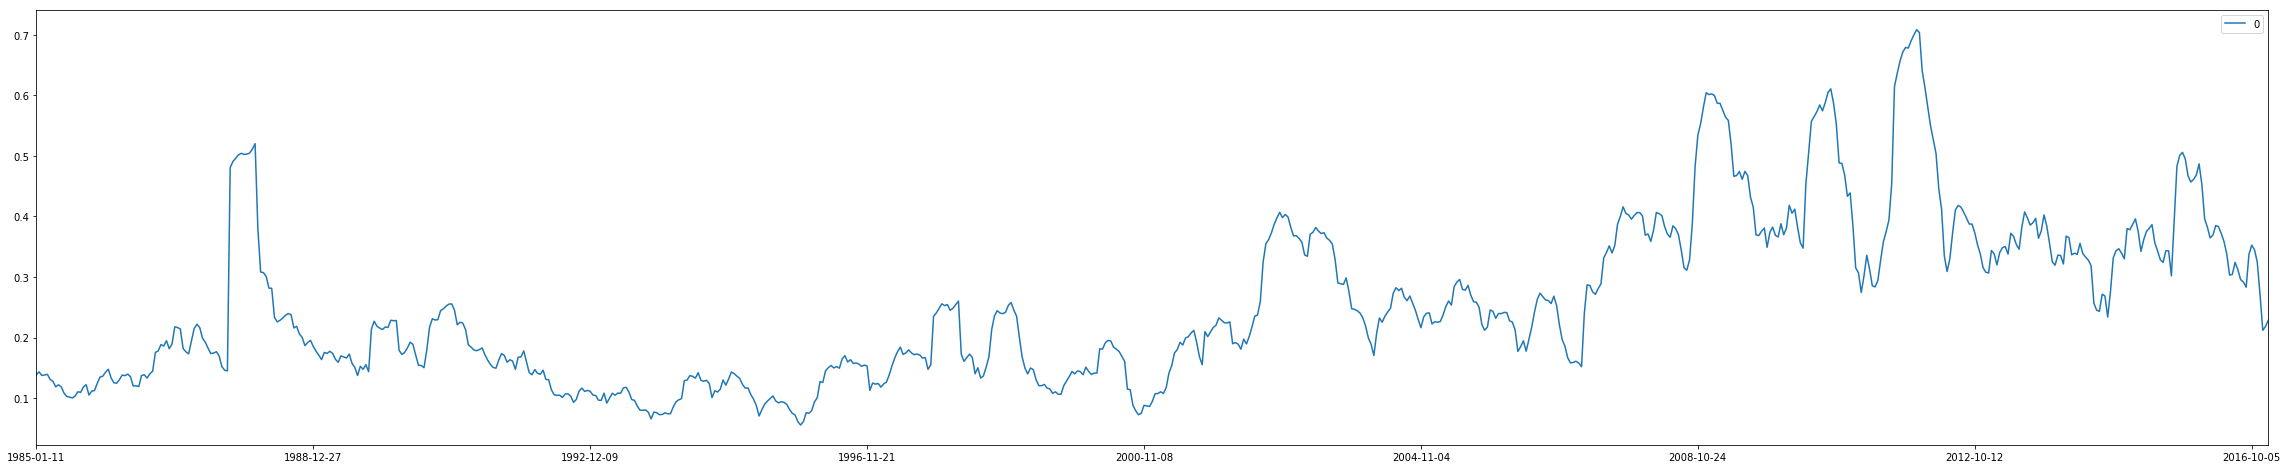

In [58]:
average_correlation.plot(figsize=(40, 8))
plt.show()

In [68]:
T8, Rpm, Adjv, Dpm, Mv, Z = eng.DBHTs(D, S, nargout=6)

In [68]:
max(np.array(T8))

array([ 11.])

In [41]:
G = nx.from_numpy_matrix(np.array(Rpm))

In [12]:
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

def draw_network(G, clusters,date):
    # Define a layout for the graph
    # pos=nx.spring_layout(G) # positions for all nodes
    pos = graphviz_layout(G)  # positions for all nodes
    fig=plt.figure(1, figsize=(40, 40))  # Let's draw a big graph so that it is clearer

    # draw the nodes: red, sized, transperancy
    nx.draw_networkx_nodes(G, pos,
                           node_color=clusters,
                           node_size=800,
                           alpha=.8)

    # draw the edges
    nx.draw_networkx_edges(G, pos,
                           edgelist=list(G.edges()),
                           width=0.5, alpha=0.5, edge_color='b')

    node_name = {}
    for node in G.nodes():
        node_name[node] = str(node)

    nx.draw_networkx_labels(G, pos, node_name, font_size=16)

    plt.axis('off')
    
    plt.savefig("Graphs/PMFG"+date+".pdf")
    plt.show()

In [13]:
G = nx.from_numpy_matrix(np.array(DBHT_results['PMFG']['2000-11-08']))
draw_network(G, DBHT_results['DBHT_clusterings']['2000-11-08'], '2000-11-08')

Using matplotlib backend: Qt5Agg


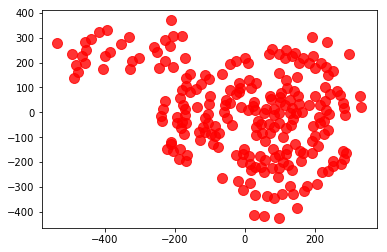

In [114]:
%matplotlib
pos = graphviz_layout(G)
nx.draw_networkx_nodes(G, pos,
                           node_size=100,
                           alpha=.8)

In [92]:
plt.show()

In [64]:
max(np.array(DBHT_results['DBHT_clusterings'][sorteddates[100]]))[0]

1.0

In [46]:
DBHT_results = DBHT(thresh=95, filename = "data/WRDS/SP500_ret_1985.csv", window=100,
     enddate='2016-12-30', startdate='1985-01-02',space=10, shrinkage='None')

corr_matrix for 2016-12-30 done.
corr_matrix for 2016-12-15 done.
corr_matrix for 2016-12-01 done.
corr_matrix for 2016-11-16 done.
corr_matrix for 2016-11-02 done.
corr_matrix for 2016-10-19 done.
corr_matrix for 2016-10-05 done.
corr_matrix for 2016-09-21 done.
corr_matrix for 2016-09-07 done.
corr_matrix for 2016-08-23 done.
corr_matrix for 2016-08-09 done.
corr_matrix for 2016-07-26 done.
corr_matrix for 2016-07-12 done.
corr_matrix for 2016-06-27 done.
corr_matrix for 2016-06-13 done.
corr_matrix for 2016-05-27 done.
corr_matrix for 2016-05-13 done.
corr_matrix for 2016-04-29 done.
corr_matrix for 2016-04-15 done.


corr_matrix for 2016-04-01 done.
corr_matrix for 2016-03-17 done.
corr_matrix for 2016-03-03 done.
corr_matrix for 2016-02-18 done.
corr_matrix for 2016-02-03 done.
corr_matrix for 2016-01-20 done.
corr_matrix for 2016-01-05 done.
corr_matrix for 2015-12-18 done.
corr_matrix for 2015-12-04 done.
corr_matrix for 2015-11-19 done.
corr_matrix for 2015-11-05 done.
corr_matrix for 2015-10-22 done.
corr_matrix for 2015-10-08 done.
corr_matrix for 2015-09-24 done.
corr_matrix for 2015-09-10 done.
corr_matrix for 2015-08-26 done.
corr_matrix for 2015-08-12 done.
corr_matrix for 2015-07-29 done.
corr_matrix for 2015-07-15 done.


corr_matrix for 2015-06-30 done.
corr_matrix for 2015-06-16 done.
corr_matrix for 2015-06-02 done.
corr_matrix for 2015-05-18 done.
corr_matrix for 2015-05-04 done.
corr_matrix for 2015-04-20 done.
corr_matrix for 2015-04-06 done.
corr_matrix for 2015-03-20 done.
corr_matrix for 2015-03-06 done.
corr_matrix for 2015-02-20 done.
corr_matrix for 2015-02-05 done.
corr_matrix for 2015-01-22 done.
corr_matrix for 2015-01-07 done.
corr_matrix for 2014-12-22 done.
corr_matrix for 2014-12-08 done.
corr_matrix for 2014-11-21 done.
corr_matrix for 2014-11-07 done.
corr_matrix for 2014-10-24 done.
corr_matrix for 2014-10-10 done.


corr_matrix for 2014-09-26 done.
corr_matrix for 2014-09-12 done.
corr_matrix for 2014-08-28 done.
corr_matrix for 2014-08-14 done.
corr_matrix for 2014-07-31 done.
corr_matrix for 2014-07-17 done.
corr_matrix for 2014-07-02 done.
corr_matrix for 2014-06-18 done.
corr_matrix for 2014-06-04 done.
corr_matrix for 2014-05-20 done.
corr_matrix for 2014-05-06 done.
corr_matrix for 2014-04-22 done.
corr_matrix for 2014-04-07 done.
corr_matrix for 2014-03-24 done.
corr_matrix for 2014-03-10 done.
corr_matrix for 2014-02-24 done.
corr_matrix for 2014-02-07 done.
corr_matrix for 2014-01-24 done.
corr_matrix for 2014-01-09 done.


corr_matrix for 2013-12-24 done.
corr_matrix for 2013-12-10 done.
corr_matrix for 2013-11-25 done.
corr_matrix for 2013-11-11 done.
corr_matrix for 2013-10-28 done.
corr_matrix for 2013-10-14 done.
corr_matrix for 2013-09-30 done.
corr_matrix for 2013-09-16 done.
corr_matrix for 2013-08-30 done.
corr_matrix for 2013-08-16 done.
corr_matrix for 2013-08-02 done.
corr_matrix for 2013-07-19 done.
corr_matrix for 2013-07-05 done.
corr_matrix for 2013-06-20 done.
corr_matrix for 2013-06-06 done.
corr_matrix for 2013-05-22 done.
corr_matrix for 2013-05-08 done.
corr_matrix for 2013-04-24 done.


corr_matrix for 2013-04-10 done.
corr_matrix for 2013-03-26 done.
corr_matrix for 2013-03-12 done.
corr_matrix for 2013-02-26 done.
corr_matrix for 2013-02-11 done.
corr_matrix for 2013-01-28 done.
corr_matrix for 2013-01-11 done.
corr_matrix for 2012-12-27 done.
corr_matrix for 2012-12-12 done.
corr_matrix for 2012-11-28 done.
corr_matrix for 2012-11-13 done.
corr_matrix for 2012-10-26 done.
corr_matrix for 2012-10-12 done.
corr_matrix for 2012-09-28 done.
corr_matrix for 2012-09-14 done.
corr_matrix for 2012-08-30 done.
corr_matrix for 2012-08-16 done.
corr_matrix for 2012-08-02 done.
corr_matrix for 2012-07-19 done.


corr_matrix for 2012-07-05 done.
corr_matrix for 2012-06-20 done.
corr_matrix for 2012-06-06 done.
corr_matrix for 2012-05-22 done.
corr_matrix for 2012-05-08 done.
corr_matrix for 2012-04-24 done.
corr_matrix for 2012-04-10 done.
corr_matrix for 2012-03-26 done.
corr_matrix for 2012-03-12 done.
corr_matrix for 2012-02-27 done.
corr_matrix for 2012-02-10 done.
corr_matrix for 2012-01-27 done.
corr_matrix for 2012-01-12 done.
corr_matrix for 2011-12-28 done.
corr_matrix for 2011-12-13 done.
corr_matrix for 2011-11-29 done.
corr_matrix for 2011-11-14 done.
corr_matrix for 2011-10-31 done.
corr_matrix for 2011-10-17 done.


corr_matrix for 2011-10-03 done.
corr_matrix for 2011-09-19 done.
corr_matrix for 2011-09-02 done.
corr_matrix for 2011-08-19 done.
corr_matrix for 2011-08-05 done.
corr_matrix for 2011-07-22 done.
corr_matrix for 2011-07-08 done.
corr_matrix for 2011-06-23 done.
corr_matrix for 2011-06-09 done.
corr_matrix for 2011-05-25 done.
corr_matrix for 2011-05-11 done.
corr_matrix for 2011-04-27 done.
corr_matrix for 2011-04-12 done.
corr_matrix for 2011-03-29 done.
corr_matrix for 2011-03-15 done.
corr_matrix for 2011-03-01 done.
corr_matrix for 2011-02-14 done.
corr_matrix for 2011-01-31 done.
corr_matrix for 2011-01-14 done.


corr_matrix for 2010-12-31 done.
corr_matrix for 2010-12-16 done.
corr_matrix for 2010-12-02 done.
corr_matrix for 2010-11-17 done.
corr_matrix for 2010-11-03 done.
corr_matrix for 2010-10-20 done.
corr_matrix for 2010-10-06 done.
corr_matrix for 2010-09-22 done.
corr_matrix for 2010-09-08 done.
corr_matrix for 2010-08-24 done.
corr_matrix for 2010-08-10 done.
corr_matrix for 2010-07-27 done.
corr_matrix for 2010-07-13 done.
corr_matrix for 2010-06-28 done.
corr_matrix for 2010-06-14 done.
corr_matrix for 2010-05-28 done.
corr_matrix for 2010-05-14 done.
corr_matrix for 2010-04-30 done.
corr_matrix for 2010-04-16 done.


corr_matrix for 2010-04-01 done.
corr_matrix for 2010-03-18 done.
corr_matrix for 2010-03-04 done.
corr_matrix for 2010-02-18 done.
corr_matrix for 2010-02-03 done.
corr_matrix for 2010-01-20 done.
corr_matrix for 2010-01-05 done.
corr_matrix for 2009-12-18 done.
corr_matrix for 2009-12-04 done.
corr_matrix for 2009-11-19 done.
corr_matrix for 2009-11-05 done.
corr_matrix for 2009-10-22 done.
corr_matrix for 2009-10-08 done.
corr_matrix for 2009-09-24 done.
corr_matrix for 2009-09-10 done.
corr_matrix for 2009-08-26 done.
corr_matrix for 2009-08-12 done.
corr_matrix for 2009-07-29 done.
corr_matrix for 2009-07-15 done.


corr_matrix for 2009-06-30 done.
corr_matrix for 2009-06-16 done.
corr_matrix for 2009-06-02 done.
corr_matrix for 2009-05-18 done.
corr_matrix for 2009-05-04 done.
corr_matrix for 2009-04-20 done.
corr_matrix for 2009-04-03 done.
corr_matrix for 2009-03-20 done.
corr_matrix for 2009-03-06 done.
corr_matrix for 2009-02-20 done.
corr_matrix for 2009-02-05 done.
corr_matrix for 2009-01-22 done.
corr_matrix for 2009-01-07 done.
corr_matrix for 2008-12-22 done.
corr_matrix for 2008-12-08 done.
corr_matrix for 2008-11-21 done.
corr_matrix for 2008-11-07 done.
corr_matrix for 2008-10-24 done.


corr_matrix for 2008-10-10 done.
corr_matrix for 2008-09-26 done.
corr_matrix for 2008-09-12 done.
corr_matrix for 2008-08-28 done.
corr_matrix for 2008-08-14 done.
corr_matrix for 2008-07-31 done.
corr_matrix for 2008-07-17 done.
corr_matrix for 2008-07-02 done.
corr_matrix for 2008-06-18 done.
corr_matrix for 2008-06-04 done.
corr_matrix for 2008-05-20 done.
corr_matrix for 2008-05-06 done.
corr_matrix for 2008-04-22 done.
corr_matrix for 2008-04-08 done.
corr_matrix for 2008-03-25 done.
corr_matrix for 2008-03-10 done.
corr_matrix for 2008-02-25 done.
corr_matrix for 2008-02-08 done.


corr_matrix for 2008-01-25 done.
corr_matrix for 2008-01-10 done.
corr_matrix for 2007-12-26 done.
corr_matrix for 2007-12-11 done.
corr_matrix for 2007-11-27 done.
corr_matrix for 2007-11-12 done.
corr_matrix for 2007-10-29 done.
corr_matrix for 2007-10-15 done.
corr_matrix for 2007-10-01 done.
corr_matrix for 2007-09-17 done.
corr_matrix for 2007-08-31 done.
corr_matrix for 2007-08-17 done.
corr_matrix for 2007-08-03 done.
corr_matrix for 2007-07-20 done.
corr_matrix for 2007-07-06 done.
corr_matrix for 2007-06-21 done.
corr_matrix for 2007-06-07 done.
corr_matrix for 2007-05-23 done.
corr_matrix for 2007-05-09 done.


corr_matrix for 2007-04-25 done.
corr_matrix for 2007-04-11 done.
corr_matrix for 2007-03-27 done.
corr_matrix for 2007-03-13 done.
corr_matrix for 2007-02-27 done.
corr_matrix for 2007-02-12 done.
corr_matrix for 2007-01-29 done.
corr_matrix for 2007-01-12 done.
corr_matrix for 2006-12-27 done.
corr_matrix for 2006-12-12 done.
corr_matrix for 2006-11-28 done.
corr_matrix for 2006-11-13 done.
corr_matrix for 2006-10-30 done.
corr_matrix for 2006-10-16 done.
corr_matrix for 2006-10-02 done.
corr_matrix for 2006-09-18 done.
corr_matrix for 2006-09-01 done.
corr_matrix for 2006-08-18 done.


corr_matrix for 2006-08-04 done.
corr_matrix for 2006-07-21 done.
corr_matrix for 2006-07-07 done.
corr_matrix for 2006-06-22 done.
corr_matrix for 2006-06-08 done.
corr_matrix for 2006-05-24 done.
corr_matrix for 2006-05-10 done.
corr_matrix for 2006-04-26 done.
corr_matrix for 2006-04-11 done.
corr_matrix for 2006-03-28 done.
corr_matrix for 2006-03-14 done.
corr_matrix for 2006-02-28 done.
corr_matrix for 2006-02-13 done.
corr_matrix for 2006-01-30 done.
corr_matrix for 2006-01-13 done.
corr_matrix for 2005-12-29 done.
corr_matrix for 2005-12-14 done.
corr_matrix for 2005-11-30 done.
corr_matrix for 2005-11-15 done.


corr_matrix for 2005-11-01 done.
corr_matrix for 2005-10-18 done.
corr_matrix for 2005-10-04 done.
corr_matrix for 2005-09-20 done.
corr_matrix for 2005-09-06 done.
corr_matrix for 2005-08-22 done.
corr_matrix for 2005-08-08 done.
corr_matrix for 2005-07-25 done.
corr_matrix for 2005-07-11 done.
corr_matrix for 2005-06-24 done.
corr_matrix for 2005-06-10 done.
corr_matrix for 2005-05-26 done.
corr_matrix for 2005-05-12 done.
corr_matrix for 2005-04-28 done.
corr_matrix for 2005-04-14 done.
corr_matrix for 2005-03-31 done.
corr_matrix for 2005-03-16 done.
corr_matrix for 2005-03-02 done.
corr_matrix for 2005-02-15 done.


corr_matrix for 2005-02-01 done.
corr_matrix for 2005-01-18 done.
corr_matrix for 2005-01-03 done.
corr_matrix for 2004-12-17 done.
corr_matrix for 2004-12-03 done.
corr_matrix for 2004-11-18 done.
corr_matrix for 2004-11-04 done.
corr_matrix for 2004-10-21 done.
corr_matrix for 2004-10-07 done.
corr_matrix for 2004-09-23 done.
corr_matrix for 2004-09-09 done.
corr_matrix for 2004-08-25 done.
corr_matrix for 2004-08-11 done.
corr_matrix for 2004-07-28 done.
corr_matrix for 2004-07-14 done.
corr_matrix for 2004-06-29 done.
corr_matrix for 2004-06-15 done.
corr_matrix for 2004-05-28 done.
corr_matrix for 2004-05-14 done.


corr_matrix for 2004-04-30 done.
corr_matrix for 2004-04-16 done.
corr_matrix for 2004-04-01 done.
corr_matrix for 2004-03-18 done.
corr_matrix for 2004-03-04 done.
corr_matrix for 2004-02-19 done.
corr_matrix for 2004-02-04 done.
corr_matrix for 2004-01-21 done.
corr_matrix for 2004-01-06 done.
corr_matrix for 2003-12-19 done.
corr_matrix for 2003-12-05 done.
corr_matrix for 2003-11-20 done.
corr_matrix for 2003-11-06 done.
corr_matrix for 2003-10-23 done.
corr_matrix for 2003-10-09 done.
corr_matrix for 2003-09-25 done.
corr_matrix for 2003-09-11 done.
corr_matrix for 2003-08-27 done.
corr_matrix for 2003-08-13 done.


corr_matrix for 2003-07-30 done.
corr_matrix for 2003-07-16 done.
corr_matrix for 2003-07-01 done.
corr_matrix for 2003-06-17 done.
corr_matrix for 2003-06-03 done.
corr_matrix for 2003-05-19 done.
corr_matrix for 2003-05-05 done.
corr_matrix for 2003-04-21 done.
corr_matrix for 2003-04-04 done.
corr_matrix for 2003-03-21 done.
corr_matrix for 2003-03-07 done.
corr_matrix for 2003-02-21 done.
corr_matrix for 2003-02-06 done.
corr_matrix for 2003-01-23 done.
corr_matrix for 2003-01-08 done.
corr_matrix for 2002-12-23 done.
corr_matrix for 2002-12-09 done.
corr_matrix for 2002-11-22 done.
corr_matrix for 2002-11-08 done.


corr_matrix for 2002-10-25 done.
corr_matrix for 2002-10-11 done.
corr_matrix for 2002-09-27 done.
corr_matrix for 2002-09-13 done.
corr_matrix for 2002-08-29 done.
corr_matrix for 2002-08-15 done.
corr_matrix for 2002-08-01 done.
corr_matrix for 2002-07-18 done.
corr_matrix for 2002-07-03 done.
corr_matrix for 2002-06-19 done.
corr_matrix for 2002-06-05 done.
corr_matrix for 2002-05-21 done.
corr_matrix for 2002-05-07 done.
corr_matrix for 2002-04-23 done.
corr_matrix for 2002-04-09 done.
corr_matrix for 2002-03-25 done.
corr_matrix for 2002-03-11 done.
corr_matrix for 2002-02-25 done.
corr_matrix for 2002-02-08 done.


corr_matrix for 2002-01-25 done.
corr_matrix for 2002-01-10 done.
corr_matrix for 2001-12-26 done.
corr_matrix for 2001-12-11 done.
corr_matrix for 2001-11-27 done.
corr_matrix for 2001-11-12 done.
corr_matrix for 2001-10-29 done.
corr_matrix for 2001-10-15 done.
corr_matrix for 2001-10-01 done.
corr_matrix for 2001-09-17 done.
corr_matrix for 2001-08-27 done.
corr_matrix for 2001-08-13 done.
corr_matrix for 2001-07-30 done.
corr_matrix for 2001-07-16 done.
corr_matrix for 2001-06-29 done.
corr_matrix for 2001-06-15 done.
corr_matrix for 2001-06-01 done.
corr_matrix for 2001-05-17 done.
corr_matrix for 2001-05-03 done.


corr_matrix for 2001-04-19 done.
corr_matrix for 2001-04-04 done.
corr_matrix for 2001-03-21 done.
corr_matrix for 2001-03-07 done.
corr_matrix for 2001-02-21 done.
corr_matrix for 2001-02-06 done.
corr_matrix for 2001-01-23 done.
corr_matrix for 2001-01-08 done.
corr_matrix for 2000-12-21 done.
corr_matrix for 2000-12-07 done.
corr_matrix for 2000-11-22 done.
corr_matrix for 2000-11-08 done.
corr_matrix for 2000-10-25 done.
corr_matrix for 2000-10-11 done.
corr_matrix for 2000-09-27 done.
corr_matrix for 2000-09-13 done.
corr_matrix for 2000-08-29 done.
corr_matrix for 2000-08-15 done.
corr_matrix for 2000-08-01 done.


corr_matrix for 2000-07-18 done.
corr_matrix for 2000-07-03 done.
corr_matrix for 2000-06-19 done.
corr_matrix for 2000-06-05 done.
corr_matrix for 2000-05-19 done.
corr_matrix for 2000-05-05 done.
corr_matrix for 2000-04-20 done.
corr_matrix for 2000-04-06 done.
corr_matrix for 2000-03-23 done.
corr_matrix for 2000-03-09 done.
corr_matrix for 2000-02-24 done.
corr_matrix for 2000-02-09 done.
corr_matrix for 2000-01-26 done.
corr_matrix for 2000-01-11 done.
corr_matrix for 1999-12-28 done.
corr_matrix for 1999-12-13 done.
corr_matrix for 1999-11-29 done.
corr_matrix for 1999-11-12 done.
corr_matrix for 1999-10-29 done.


corr_matrix for 1999-10-15 done.
corr_matrix for 1999-10-01 done.
corr_matrix for 1999-09-17 done.
corr_matrix for 1999-09-02 done.
corr_matrix for 1999-08-19 done.
corr_matrix for 1999-08-05 done.
corr_matrix for 1999-07-22 done.
corr_matrix for 1999-07-08 done.
corr_matrix for 1999-06-23 done.
corr_matrix for 1999-06-09 done.
corr_matrix for 1999-05-25 done.
corr_matrix for 1999-05-11 done.
corr_matrix for 1999-04-27 done.
corr_matrix for 1999-04-13 done.
corr_matrix for 1999-03-29 done.
corr_matrix for 1999-03-15 done.
corr_matrix for 1999-03-01 done.
corr_matrix for 1999-02-12 done.
corr_matrix for 1999-01-29 done.


corr_matrix for 1999-01-14 done.
corr_matrix for 1998-12-30 done.
corr_matrix for 1998-12-15 done.
corr_matrix for 1998-12-01 done.
corr_matrix for 1998-11-16 done.
corr_matrix for 1998-11-02 done.
corr_matrix for 1998-10-19 done.
corr_matrix for 1998-10-05 done.
corr_matrix for 1998-09-21 done.
corr_matrix for 1998-09-04 done.
corr_matrix for 1998-08-21 done.
corr_matrix for 1998-08-07 done.
corr_matrix for 1998-07-24 done.
corr_matrix for 1998-07-10 done.
corr_matrix for 1998-06-25 done.
corr_matrix for 1998-06-11 done.
corr_matrix for 1998-05-28 done.
corr_matrix for 1998-05-13 done.
corr_matrix for 1998-04-29 done.


corr_matrix for 1998-04-15 done.
corr_matrix for 1998-03-31 done.
corr_matrix for 1998-03-17 done.
corr_matrix for 1998-03-03 done.
corr_matrix for 1998-02-17 done.
corr_matrix for 1998-02-02 done.
corr_matrix for 1998-01-16 done.
corr_matrix for 1998-01-02 done.
corr_matrix for 1997-12-17 done.
corr_matrix for 1997-12-03 done.
corr_matrix for 1997-11-18 done.
corr_matrix for 1997-11-04 done.
corr_matrix for 1997-10-21 done.
corr_matrix for 1997-10-07 done.
corr_matrix for 1997-09-23 done.
corr_matrix for 1997-09-09 done.
corr_matrix for 1997-08-25 done.
corr_matrix for 1997-08-11 done.
corr_matrix for 1997-07-28 done.


corr_matrix for 1997-07-14 done.
corr_matrix for 1997-06-27 done.
corr_matrix for 1997-06-13 done.
corr_matrix for 1997-05-30 done.
corr_matrix for 1997-05-15 done.
corr_matrix for 1997-05-01 done.
corr_matrix for 1997-04-17 done.
corr_matrix for 1997-04-03 done.
corr_matrix for 1997-03-19 done.
corr_matrix for 1997-03-05 done.
corr_matrix for 1997-02-19 done.
corr_matrix for 1997-02-04 done.
corr_matrix for 1997-01-21 done.
corr_matrix for 1997-01-07 done.
corr_matrix for 1996-12-20 done.
corr_matrix for 1996-12-06 done.
corr_matrix for 1996-11-21 done.
corr_matrix for 1996-11-07 done.
corr_matrix for 1996-10-24 done.


corr_matrix for 1996-10-10 done.
corr_matrix for 1996-09-26 done.
corr_matrix for 1996-09-12 done.
corr_matrix for 1996-08-28 done.
corr_matrix for 1996-08-14 done.
corr_matrix for 1996-07-31 done.
corr_matrix for 1996-07-17 done.
corr_matrix for 1996-07-02 done.
corr_matrix for 1996-06-18 done.
corr_matrix for 1996-06-04 done.
corr_matrix for 1996-05-20 done.
corr_matrix for 1996-05-06 done.
corr_matrix for 1996-04-22 done.
corr_matrix for 1996-04-08 done.
corr_matrix for 1996-03-22 done.
corr_matrix for 1996-03-08 done.
corr_matrix for 1996-02-23 done.
corr_matrix for 1996-02-08 done.
corr_matrix for 1996-01-25 done.


corr_matrix for 1996-01-11 done.
corr_matrix for 1995-12-27 done.
corr_matrix for 1995-12-12 done.
corr_matrix for 1995-11-28 done.
corr_matrix for 1995-11-13 done.
corr_matrix for 1995-10-30 done.
corr_matrix for 1995-10-16 done.
corr_matrix for 1995-10-02 done.
corr_matrix for 1995-09-18 done.
corr_matrix for 1995-09-01 done.
corr_matrix for 1995-08-18 done.
corr_matrix for 1995-08-04 done.
corr_matrix for 1995-07-21 done.
corr_matrix for 1995-07-07 done.
corr_matrix for 1995-06-22 done.
corr_matrix for 1995-06-08 done.
corr_matrix for 1995-05-24 done.
corr_matrix for 1995-05-10 done.
corr_matrix for 1995-04-26 done.


corr_matrix for 1995-04-11 done.
corr_matrix for 1995-03-28 done.
corr_matrix for 1995-03-14 done.
corr_matrix for 1995-02-28 done.
corr_matrix for 1995-02-13 done.
corr_matrix for 1995-01-30 done.
corr_matrix for 1995-01-16 done.
corr_matrix for 1994-12-30 done.
corr_matrix for 1994-12-15 done.
corr_matrix for 1994-12-01 done.
corr_matrix for 1994-11-16 done.
corr_matrix for 1994-11-02 done.
corr_matrix for 1994-10-19 done.
corr_matrix for 1994-10-05 done.
corr_matrix for 1994-09-21 done.
corr_matrix for 1994-09-07 done.
corr_matrix for 1994-08-23 done.
corr_matrix for 1994-08-09 done.
corr_matrix for 1994-07-26 done.


corr_matrix for 1994-07-12 done.
corr_matrix for 1994-06-27 done.
corr_matrix for 1994-06-13 done.
corr_matrix for 1994-05-27 done.
corr_matrix for 1994-05-13 done.
corr_matrix for 1994-04-29 done.
corr_matrix for 1994-04-14 done.
corr_matrix for 1994-03-30 done.
corr_matrix for 1994-03-16 done.
corr_matrix for 1994-03-02 done.
corr_matrix for 1994-02-15 done.
corr_matrix for 1994-02-01 done.
corr_matrix for 1994-01-18 done.
corr_matrix for 1994-01-04 done.
corr_matrix for 1993-12-20 done.
corr_matrix for 1993-12-06 done.
corr_matrix for 1993-11-19 done.
corr_matrix for 1993-11-05 done.
corr_matrix for 1993-10-22 done.


corr_matrix for 1993-10-08 done.
corr_matrix for 1993-09-24 done.
corr_matrix for 1993-09-10 done.
corr_matrix for 1993-08-26 done.
corr_matrix for 1993-08-12 done.
corr_matrix for 1993-07-29 done.
corr_matrix for 1993-07-15 done.
corr_matrix for 1993-06-30 done.
corr_matrix for 1993-06-16 done.
corr_matrix for 1993-06-02 done.
corr_matrix for 1993-05-18 done.
corr_matrix for 1993-05-04 done.
corr_matrix for 1993-04-20 done.
corr_matrix for 1993-04-05 done.
corr_matrix for 1993-03-22 done.
corr_matrix for 1993-03-08 done.
corr_matrix for 1993-02-22 done.
corr_matrix for 1993-02-05 done.
corr_matrix for 1993-01-22 done.


corr_matrix for 1993-01-08 done.
corr_matrix for 1992-12-23 done.
corr_matrix for 1992-12-09 done.
corr_matrix for 1992-11-24 done.
corr_matrix for 1992-11-10 done.
corr_matrix for 1992-10-27 done.
corr_matrix for 1992-10-13 done.
corr_matrix for 1992-09-29 done.
corr_matrix for 1992-09-15 done.
corr_matrix for 1992-08-31 done.
corr_matrix for 1992-08-17 done.
corr_matrix for 1992-08-03 done.
corr_matrix for 1992-07-20 done.
corr_matrix for 1992-07-06 done.
corr_matrix for 1992-06-19 done.
corr_matrix for 1992-06-05 done.
corr_matrix for 1992-05-21 done.
corr_matrix for 1992-05-07 done.
corr_matrix for 1992-04-23 done.


corr_matrix for 1992-04-08 done.
corr_matrix for 1992-03-25 done.
corr_matrix for 1992-03-11 done.
corr_matrix for 1992-02-26 done.
corr_matrix for 1992-02-11 done.
corr_matrix for 1992-01-28 done.
corr_matrix for 1992-01-14 done.
corr_matrix for 1991-12-30 done.
corr_matrix for 1991-12-13 done.
corr_matrix for 1991-11-29 done.
corr_matrix for 1991-11-14 done.
corr_matrix for 1991-10-31 done.
corr_matrix for 1991-10-17 done.
corr_matrix for 1991-10-03 done.
corr_matrix for 1991-09-19 done.
corr_matrix for 1991-09-05 done.
corr_matrix for 1991-08-21 done.
corr_matrix for 1991-08-07 done.
corr_matrix for 1991-07-24 done.


corr_matrix for 1991-07-10 done.
corr_matrix for 1991-06-25 done.
corr_matrix for 1991-06-11 done.
corr_matrix for 1991-05-28 done.
corr_matrix for 1991-05-13 done.
corr_matrix for 1991-04-29 done.
corr_matrix for 1991-04-15 done.
corr_matrix for 1991-04-01 done.
corr_matrix for 1991-03-15 done.
corr_matrix for 1991-03-01 done.
corr_matrix for 1991-02-14 done.
corr_matrix for 1991-01-31 done.
corr_matrix for 1991-01-17 done.
corr_matrix for 1991-01-03 done.
corr_matrix for 1990-12-18 done.
corr_matrix for 1990-12-04 done.
corr_matrix for 1990-11-19 done.
corr_matrix for 1990-11-05 done.
corr_matrix for 1990-10-22 done.


corr_matrix for 1990-10-08 done.
corr_matrix for 1990-09-24 done.
corr_matrix for 1990-09-10 done.
corr_matrix for 1990-08-24 done.
corr_matrix for 1990-08-10 done.
corr_matrix for 1990-07-27 done.
corr_matrix for 1990-07-13 done.
corr_matrix for 1990-06-28 done.
corr_matrix for 1990-06-14 done.
corr_matrix for 1990-05-31 done.
corr_matrix for 1990-05-16 done.
corr_matrix for 1990-05-02 done.
corr_matrix for 1990-04-18 done.
corr_matrix for 1990-04-03 done.
corr_matrix for 1990-03-20 done.
corr_matrix for 1990-03-06 done.
corr_matrix for 1990-02-20 done.
corr_matrix for 1990-02-05 done.
corr_matrix for 1990-01-22 done.


corr_matrix for 1990-01-08 done.
corr_matrix for 1989-12-21 done.
corr_matrix for 1989-12-07 done.
corr_matrix for 1989-11-22 done.
corr_matrix for 1989-11-08 done.
corr_matrix for 1989-10-25 done.
corr_matrix for 1989-10-11 done.
corr_matrix for 1989-09-27 done.
corr_matrix for 1989-09-13 done.
corr_matrix for 1989-08-29 done.
corr_matrix for 1989-08-15 done.
corr_matrix for 1989-08-01 done.
corr_matrix for 1989-07-18 done.
corr_matrix for 1989-07-03 done.
corr_matrix for 1989-06-19 done.
corr_matrix for 1989-06-05 done.
corr_matrix for 1989-05-19 done.
corr_matrix for 1989-05-05 done.
corr_matrix for 1989-04-21 done.


corr_matrix for 1989-04-07 done.
corr_matrix for 1989-03-23 done.
corr_matrix for 1989-03-09 done.
corr_matrix for 1989-02-23 done.
corr_matrix for 1989-02-08 done.
corr_matrix for 1989-01-25 done.
corr_matrix for 1989-01-11 done.
corr_matrix for 1988-12-27 done.
corr_matrix for 1988-12-12 done.
corr_matrix for 1988-11-28 done.
corr_matrix for 1988-11-11 done.
corr_matrix for 1988-10-28 done.
corr_matrix for 1988-10-14 done.
corr_matrix for 1988-09-30 done.
corr_matrix for 1988-09-16 done.
corr_matrix for 1988-09-01 done.
corr_matrix for 1988-08-18 done.
corr_matrix for 1988-08-04 done.
corr_matrix for 1988-07-21 done.


corr_matrix for 1988-07-07 done.
corr_matrix for 1988-06-22 done.
corr_matrix for 1988-06-08 done.
corr_matrix for 1988-05-24 done.
corr_matrix for 1988-05-10 done.
corr_matrix for 1988-04-26 done.
corr_matrix for 1988-04-12 done.
corr_matrix for 1988-03-28 done.
corr_matrix for 1988-03-14 done.
corr_matrix for 1988-02-29 done.
corr_matrix for 1988-02-12 done.
corr_matrix for 1988-01-29 done.
corr_matrix for 1988-01-15 done.
corr_matrix for 1987-12-31 done.
corr_matrix for 1987-12-16 done.
corr_matrix for 1987-12-02 done.
corr_matrix for 1987-11-17 done.
corr_matrix for 1987-11-03 done.


corr_matrix for 1987-10-20 done.
corr_matrix for 1987-10-06 done.
corr_matrix for 1987-09-22 done.
corr_matrix for 1987-09-08 done.
corr_matrix for 1987-08-24 done.
corr_matrix for 1987-08-10 done.
corr_matrix for 1987-07-27 done.
corr_matrix for 1987-07-13 done.
corr_matrix for 1987-06-26 done.
corr_matrix for 1987-06-12 done.
corr_matrix for 1987-05-29 done.
corr_matrix for 1987-05-14 done.
corr_matrix for 1987-04-30 done.
corr_matrix for 1987-04-15 done.
corr_matrix for 1987-04-01 done.
corr_matrix for 1987-03-18 done.
corr_matrix for 1987-03-04 done.
corr_matrix for 1987-02-18 done.


corr_matrix for 1987-02-03 done.
corr_matrix for 1987-01-20 done.
corr_matrix for 1987-01-06 done.
corr_matrix for 1986-12-19 done.
corr_matrix for 1986-12-05 done.
corr_matrix for 1986-11-20 done.
corr_matrix for 1986-11-06 done.
corr_matrix for 1986-10-23 done.
corr_matrix for 1986-10-09 done.
corr_matrix for 1986-09-25 done.
corr_matrix for 1986-09-11 done.
corr_matrix for 1986-08-27 done.
corr_matrix for 1986-08-13 done.
corr_matrix for 1986-07-30 done.
corr_matrix for 1986-07-16 done.
corr_matrix for 1986-07-01 done.
corr_matrix for 1986-06-17 done.
corr_matrix for 1986-06-03 done.


corr_matrix for 1986-05-19 done.
corr_matrix for 1986-05-05 done.
corr_matrix for 1986-04-21 done.
corr_matrix for 1986-04-07 done.
corr_matrix for 1986-03-21 done.
corr_matrix for 1986-03-07 done.
corr_matrix for 1986-02-21 done.
corr_matrix for 1986-02-06 done.
corr_matrix for 1986-01-23 done.
corr_matrix for 1986-01-09 done.
corr_matrix for 1985-12-24 done.
corr_matrix for 1985-12-10 done.
corr_matrix for 1985-11-25 done.
corr_matrix for 1985-11-11 done.
corr_matrix for 1985-10-28 done.
corr_matrix for 1985-10-14 done.
corr_matrix for 1985-09-30 done.
corr_matrix for 1985-09-13 done.
corr_matrix for 1985-08-29 done.


corr_matrix for 1985-08-15 done.
corr_matrix for 1985-08-01 done.
corr_matrix for 1985-07-18 done.
corr_matrix for 1985-07-03 done.
corr_matrix for 1985-06-19 done.
corr_matrix for 1985-06-05 done.
corr_matrix for 1985-05-21 done.
corr_matrix for 1985-05-07 done.
corr_matrix for 1985-04-23 done.
corr_matrix for 1985-04-09 done.
corr_matrix for 1985-03-25 done.
corr_matrix for 1985-03-11 done.
corr_matrix for 1985-02-25 done.
corr_matrix for 1985-02-08 done.
corr_matrix for 1985-01-25 done.
corr_matrix for 1985-01-11 done.


building DBHT for the number 1 date 1985-01-11 done.


building DBHT for the number 2 date 1985-01-25 done.


building DBHT for the number 3 date 1985-02-08 done.


building DBHT for the number 4 date 1985-02-25 done.


building DBHT for the number 5 date 1985-03-11 done.


building DBHT for the number 6 date 1985-03-25 done.


building DBHT for the number 7 date 1985-04-09 done.


building DBHT for the number 8 date 1985-04-23 done.


building DBHT for the number 9 date 1985-05-07 done.


building DBHT for the number 10 date 1985-05-21 done.


building DBHT for the number 11 date 1985-06-05 done.


building DBHT for the number 12 date 1985-06-19 done.


building DBHT for the number 13 date 1985-07-03 done.


building DBHT for the number 14 date 1985-07-18 done.


building DBHT for the number 15 date 1985-08-01 done.


building DBHT for the number 16 date 1985-08-15 done.


building DBHT for the number 17 date 1985-08-29 done.


building DBHT for the number 18 date 1985-09-13 done.


building DBHT for the number 19 date 1985-09-30 done.


building DBHT for the number 20 date 1985-10-14 done.


building DBHT for the number 21 date 1985-10-28 done.


building DBHT for the number 22 date 1985-11-11 done.


building DBHT for the number 23 date 1985-11-25 done.


building DBHT for the number 24 date 1985-12-10 done.


building DBHT for the number 25 date 1985-12-24 done.


building DBHT for the number 26 date 1986-01-09 done.


building DBHT for the number 27 date 1986-01-23 done.


building DBHT for the number 28 date 1986-02-06 done.


building DBHT for the number 29 date 1986-02-21 done.


building DBHT for the number 30 date 1986-03-07 done.


building DBHT for the number 31 date 1986-03-21 done.


building DBHT for the number 32 date 1986-04-07 done.


building DBHT for the number 33 date 1986-04-21 done.


building DBHT for the number 34 date 1986-05-05 done.


building DBHT for the number 35 date 1986-05-19 done.


building DBHT for the number 36 date 1986-06-03 done.


building DBHT for the number 37 date 1986-06-17 done.


building DBHT for the number 38 date 1986-07-01 done.


building DBHT for the number 39 date 1986-07-16 done.


building DBHT for the number 40 date 1986-07-30 done.


building DBHT for the number 41 date 1986-08-13 done.


building DBHT for the number 42 date 1986-08-27 done.


building DBHT for the number 43 date 1986-09-11 done.


building DBHT for the number 44 date 1986-09-25 done.


building DBHT for the number 45 date 1986-10-09 done.


building DBHT for the number 46 date 1986-10-23 done.


building DBHT for the number 47 date 1986-11-06 done.


building DBHT for the number 48 date 1986-11-20 done.


building DBHT for the number 49 date 1986-12-05 done.


building DBHT for the number 50 date 1986-12-19 done.


building DBHT for the number 51 date 1987-01-06 done.


building DBHT for the number 52 date 1987-01-20 done.


building DBHT for the number 53 date 1987-02-03 done.


building DBHT for the number 54 date 1987-02-18 done.


building DBHT for the number 55 date 1987-03-04 done.


building DBHT for the number 56 date 1987-03-18 done.


building DBHT for the number 57 date 1987-04-01 done.


building DBHT for the number 58 date 1987-04-15 done.


building DBHT for the number 59 date 1987-04-30 done.


building DBHT for the number 60 date 1987-05-14 done.


building DBHT for the number 61 date 1987-05-29 done.


building DBHT for the number 62 date 1987-06-12 done.


building DBHT for the number 63 date 1987-06-26 done.


building DBHT for the number 64 date 1987-07-13 done.


building DBHT for the number 65 date 1987-07-27 done.


building DBHT for the number 66 date 1987-08-10 done.


building DBHT for the number 67 date 1987-08-24 done.


building DBHT for the number 68 date 1987-09-08 done.


building DBHT for the number 69 date 1987-09-22 done.


building DBHT for the number 70 date 1987-10-06 done.


building DBHT for the number 71 date 1987-10-20 done.


building DBHT for the number 72 date 1987-11-03 done.


building DBHT for the number 73 date 1987-11-17 done.


building DBHT for the number 74 date 1987-12-02 done.


building DBHT for the number 75 date 1987-12-16 done.


building DBHT for the number 76 date 1987-12-31 done.


building DBHT for the number 77 date 1988-01-15 done.


building DBHT for the number 78 date 1988-01-29 done.


building DBHT for the number 79 date 1988-02-12 done.


building DBHT for the number 80 date 1988-02-29 done.


building DBHT for the number 81 date 1988-03-14 done.


building DBHT for the number 82 date 1988-03-28 done.


building DBHT for the number 83 date 1988-04-12 done.


building DBHT for the number 84 date 1988-04-26 done.


building DBHT for the number 85 date 1988-05-10 done.


building DBHT for the number 86 date 1988-05-24 done.


building DBHT for the number 87 date 1988-06-08 done.


building DBHT for the number 88 date 1988-06-22 done.


building DBHT for the number 89 date 1988-07-07 done.


building DBHT for the number 90 date 1988-07-21 done.


building DBHT for the number 91 date 1988-08-04 done.


building DBHT for the number 92 date 1988-08-18 done.


building DBHT for the number 93 date 1988-09-01 done.


building DBHT for the number 94 date 1988-09-16 done.


building DBHT for the number 95 date 1988-09-30 done.


building DBHT for the number 96 date 1988-10-14 done.


building DBHT for the number 97 date 1988-10-28 done.


building DBHT for the number 98 date 1988-11-11 done.


building DBHT for the number 99 date 1988-11-28 done.


building DBHT for the number 100 date 1988-12-12 done.


building DBHT for the number 101 date 1988-12-27 done.


building DBHT for the number 102 date 1989-01-11 done.


building DBHT for the number 103 date 1989-01-25 done.


building DBHT for the number 104 date 1989-02-08 done.


building DBHT for the number 105 date 1989-02-23 done.


building DBHT for the number 106 date 1989-03-09 done.


building DBHT for the number 107 date 1989-03-23 done.


building DBHT for the number 108 date 1989-04-07 done.


building DBHT for the number 109 date 1989-04-21 done.


building DBHT for the number 110 date 1989-05-05 done.


building DBHT for the number 111 date 1989-05-19 done.


building DBHT for the number 112 date 1989-06-05 done.


building DBHT for the number 113 date 1989-06-19 done.


building DBHT for the number 114 date 1989-07-03 done.


building DBHT for the number 115 date 1989-07-18 done.


building DBHT for the number 116 date 1989-08-01 done.


building DBHT for the number 117 date 1989-08-15 done.


building DBHT for the number 118 date 1989-08-29 done.


building DBHT for the number 119 date 1989-09-13 done.


building DBHT for the number 120 date 1989-09-27 done.


building DBHT for the number 121 date 1989-10-11 done.


building DBHT for the number 122 date 1989-10-25 done.


building DBHT for the number 123 date 1989-11-08 done.


building DBHT for the number 124 date 1989-11-22 done.


building DBHT for the number 125 date 1989-12-07 done.


building DBHT for the number 126 date 1989-12-21 done.


building DBHT for the number 127 date 1990-01-08 done.


building DBHT for the number 128 date 1990-01-22 done.


building DBHT for the number 129 date 1990-02-05 done.


building DBHT for the number 130 date 1990-02-20 done.


building DBHT for the number 131 date 1990-03-06 done.


building DBHT for the number 132 date 1990-03-20 done.


building DBHT for the number 133 date 1990-04-03 done.


building DBHT for the number 134 date 1990-04-18 done.


building DBHT for the number 135 date 1990-05-02 done.


building DBHT for the number 136 date 1990-05-16 done.


building DBHT for the number 137 date 1990-05-31 done.


building DBHT for the number 138 date 1990-06-14 done.


building DBHT for the number 139 date 1990-06-28 done.


building DBHT for the number 140 date 1990-07-13 done.


building DBHT for the number 141 date 1990-07-27 done.


building DBHT for the number 142 date 1990-08-10 done.


building DBHT for the number 143 date 1990-08-24 done.


building DBHT for the number 144 date 1990-09-10 done.


building DBHT for the number 145 date 1990-09-24 done.


building DBHT for the number 146 date 1990-10-08 done.


building DBHT for the number 147 date 1990-10-22 done.


building DBHT for the number 148 date 1990-11-05 done.


building DBHT for the number 149 date 1990-11-19 done.


building DBHT for the number 150 date 1990-12-04 done.


building DBHT for the number 151 date 1990-12-18 done.


building DBHT for the number 152 date 1991-01-03 done.


building DBHT for the number 153 date 1991-01-17 done.


building DBHT for the number 154 date 1991-01-31 done.


building DBHT for the number 155 date 1991-02-14 done.


building DBHT for the number 156 date 1991-03-01 done.


building DBHT for the number 157 date 1991-03-15 done.


building DBHT for the number 158 date 1991-04-01 done.


building DBHT for the number 159 date 1991-04-15 done.


building DBHT for the number 160 date 1991-04-29 done.


building DBHT for the number 161 date 1991-05-13 done.


building DBHT for the number 162 date 1991-05-28 done.


building DBHT for the number 163 date 1991-06-11 done.


building DBHT for the number 164 date 1991-06-25 done.


building DBHT for the number 165 date 1991-07-10 done.


building DBHT for the number 166 date 1991-07-24 done.


building DBHT for the number 167 date 1991-08-07 done.


building DBHT for the number 168 date 1991-08-21 done.


building DBHT for the number 169 date 1991-09-05 done.


building DBHT for the number 170 date 1991-09-19 done.


building DBHT for the number 171 date 1991-10-03 done.


building DBHT for the number 172 date 1991-10-17 done.


building DBHT for the number 173 date 1991-10-31 done.


building DBHT for the number 174 date 1991-11-14 done.


building DBHT for the number 175 date 1991-11-29 done.


building DBHT for the number 176 date 1991-12-13 done.


building DBHT for the number 177 date 1991-12-30 done.


building DBHT for the number 178 date 1992-01-14 done.


building DBHT for the number 179 date 1992-01-28 done.


building DBHT for the number 180 date 1992-02-11 done.


building DBHT for the number 181 date 1992-02-26 done.


building DBHT for the number 182 date 1992-03-11 done.


building DBHT for the number 183 date 1992-03-25 done.


building DBHT for the number 184 date 1992-04-08 done.


building DBHT for the number 185 date 1992-04-23 done.


building DBHT for the number 186 date 1992-05-07 done.


building DBHT for the number 187 date 1992-05-21 done.


building DBHT for the number 188 date 1992-06-05 done.


building DBHT for the number 189 date 1992-06-19 done.


building DBHT for the number 190 date 1992-07-06 done.


building DBHT for the number 191 date 1992-07-20 done.


building DBHT for the number 192 date 1992-08-03 done.


building DBHT for the number 193 date 1992-08-17 done.


building DBHT for the number 194 date 1992-08-31 done.


building DBHT for the number 195 date 1992-09-15 done.


building DBHT for the number 196 date 1992-09-29 done.


building DBHT for the number 197 date 1992-10-13 done.


building DBHT for the number 198 date 1992-10-27 done.


building DBHT for the number 199 date 1992-11-10 done.


building DBHT for the number 200 date 1992-11-24 done.


building DBHT for the number 201 date 1992-12-09 done.


building DBHT for the number 202 date 1992-12-23 done.


building DBHT for the number 203 date 1993-01-08 done.


building DBHT for the number 204 date 1993-01-22 done.


building DBHT for the number 205 date 1993-02-05 done.


building DBHT for the number 206 date 1993-02-22 done.


building DBHT for the number 207 date 1993-03-08 done.


building DBHT for the number 208 date 1993-03-22 done.


building DBHT for the number 209 date 1993-04-05 done.


building DBHT for the number 210 date 1993-04-20 done.


building DBHT for the number 211 date 1993-05-04 done.


building DBHT for the number 212 date 1993-05-18 done.


building DBHT for the number 213 date 1993-06-02 done.


building DBHT for the number 214 date 1993-06-16 done.


building DBHT for the number 215 date 1993-06-30 done.


building DBHT for the number 216 date 1993-07-15 done.


building DBHT for the number 217 date 1993-07-29 done.


building DBHT for the number 218 date 1993-08-12 done.


building DBHT for the number 219 date 1993-08-26 done.


building DBHT for the number 220 date 1993-09-10 done.


building DBHT for the number 221 date 1993-09-24 done.


building DBHT for the number 222 date 1993-10-08 done.


building DBHT for the number 223 date 1993-10-22 done.


building DBHT for the number 224 date 1993-11-05 done.


building DBHT for the number 225 date 1993-11-19 done.


building DBHT for the number 226 date 1993-12-06 done.


building DBHT for the number 227 date 1993-12-20 done.


building DBHT for the number 228 date 1994-01-04 done.


building DBHT for the number 229 date 1994-01-18 done.


building DBHT for the number 230 date 1994-02-01 done.


building DBHT for the number 231 date 1994-02-15 done.


building DBHT for the number 232 date 1994-03-02 done.


building DBHT for the number 233 date 1994-03-16 done.


building DBHT for the number 234 date 1994-03-30 done.


building DBHT for the number 235 date 1994-04-14 done.


building DBHT for the number 236 date 1994-04-29 done.


building DBHT for the number 237 date 1994-05-13 done.


building DBHT for the number 238 date 1994-05-27 done.


building DBHT for the number 239 date 1994-06-13 done.


building DBHT for the number 240 date 1994-06-27 done.


building DBHT for the number 241 date 1994-07-12 done.


building DBHT for the number 242 date 1994-07-26 done.


building DBHT for the number 243 date 1994-08-09 done.


building DBHT for the number 244 date 1994-08-23 done.


building DBHT for the number 245 date 1994-09-07 done.


building DBHT for the number 246 date 1994-09-21 done.


building DBHT for the number 247 date 1994-10-05 done.


building DBHT for the number 248 date 1994-10-19 done.


building DBHT for the number 249 date 1994-11-02 done.


building DBHT for the number 250 date 1994-11-16 done.


building DBHT for the number 251 date 1994-12-01 done.


building DBHT for the number 252 date 1994-12-15 done.


building DBHT for the number 253 date 1994-12-30 done.


building DBHT for the number 254 date 1995-01-16 done.


building DBHT for the number 255 date 1995-01-30 done.


building DBHT for the number 256 date 1995-02-13 done.


building DBHT for the number 257 date 1995-02-28 done.


building DBHT for the number 258 date 1995-03-14 done.


building DBHT for the number 259 date 1995-03-28 done.


building DBHT for the number 260 date 1995-04-11 done.


building DBHT for the number 261 date 1995-04-26 done.


building DBHT for the number 262 date 1995-05-10 done.


building DBHT for the number 263 date 1995-05-24 done.


building DBHT for the number 264 date 1995-06-08 done.


building DBHT for the number 265 date 1995-06-22 done.


building DBHT for the number 266 date 1995-07-07 done.


building DBHT for the number 267 date 1995-07-21 done.


building DBHT for the number 268 date 1995-08-04 done.


building DBHT for the number 269 date 1995-08-18 done.


building DBHT for the number 270 date 1995-09-01 done.


building DBHT for the number 271 date 1995-09-18 done.


building DBHT for the number 272 date 1995-10-02 done.


building DBHT for the number 273 date 1995-10-16 done.


building DBHT for the number 274 date 1995-10-30 done.


building DBHT for the number 275 date 1995-11-13 done.


building DBHT for the number 276 date 1995-11-28 done.


building DBHT for the number 277 date 1995-12-12 done.


building DBHT for the number 278 date 1995-12-27 done.


building DBHT for the number 279 date 1996-01-11 done.


building DBHT for the number 280 date 1996-01-25 done.


building DBHT for the number 281 date 1996-02-08 done.


building DBHT for the number 282 date 1996-02-23 done.


building DBHT for the number 283 date 1996-03-08 done.


building DBHT for the number 284 date 1996-03-22 done.


building DBHT for the number 285 date 1996-04-08 done.


building DBHT for the number 286 date 1996-04-22 done.


building DBHT for the number 287 date 1996-05-06 done.


building DBHT for the number 288 date 1996-05-20 done.


building DBHT for the number 289 date 1996-06-04 done.


building DBHT for the number 290 date 1996-06-18 done.


building DBHT for the number 291 date 1996-07-02 done.


building DBHT for the number 292 date 1996-07-17 done.


building DBHT for the number 293 date 1996-07-31 done.


building DBHT for the number 294 date 1996-08-14 done.


building DBHT for the number 295 date 1996-08-28 done.


building DBHT for the number 296 date 1996-09-12 done.


building DBHT for the number 297 date 1996-09-26 done.


building DBHT for the number 298 date 1996-10-10 done.


building DBHT for the number 299 date 1996-10-24 done.


building DBHT for the number 300 date 1996-11-07 done.


building DBHT for the number 301 date 1996-11-21 done.


building DBHT for the number 302 date 1996-12-06 done.


building DBHT for the number 303 date 1996-12-20 done.


building DBHT for the number 304 date 1997-01-07 done.


building DBHT for the number 305 date 1997-01-21 done.


building DBHT for the number 306 date 1997-02-04 done.


building DBHT for the number 307 date 1997-02-19 done.


building DBHT for the number 308 date 1997-03-05 done.


building DBHT for the number 309 date 1997-03-19 done.


building DBHT for the number 310 date 1997-04-03 done.


building DBHT for the number 311 date 1997-04-17 done.


building DBHT for the number 312 date 1997-05-01 done.


building DBHT for the number 313 date 1997-05-15 done.


building DBHT for the number 314 date 1997-05-30 done.


building DBHT for the number 315 date 1997-06-13 done.


building DBHT for the number 316 date 1997-06-27 done.


building DBHT for the number 317 date 1997-07-14 done.


building DBHT for the number 318 date 1997-07-28 done.


building DBHT for the number 319 date 1997-08-11 done.


building DBHT for the number 320 date 1997-08-25 done.


building DBHT for the number 321 date 1997-09-09 done.


building DBHT for the number 322 date 1997-09-23 done.


building DBHT for the number 323 date 1997-10-07 done.


building DBHT for the number 324 date 1997-10-21 done.


building DBHT for the number 325 date 1997-11-04 done.


building DBHT for the number 326 date 1997-11-18 done.


building DBHT for the number 327 date 1997-12-03 done.


building DBHT for the number 328 date 1997-12-17 done.


building DBHT for the number 329 date 1998-01-02 done.


building DBHT for the number 330 date 1998-01-16 done.


building DBHT for the number 331 date 1998-02-02 done.


building DBHT for the number 332 date 1998-02-17 done.


building DBHT for the number 333 date 1998-03-03 done.


building DBHT for the number 334 date 1998-03-17 done.


building DBHT for the number 335 date 1998-03-31 done.


building DBHT for the number 336 date 1998-04-15 done.


building DBHT for the number 337 date 1998-04-29 done.


building DBHT for the number 338 date 1998-05-13 done.


building DBHT for the number 339 date 1998-05-28 done.


building DBHT for the number 340 date 1998-06-11 done.


building DBHT for the number 341 date 1998-06-25 done.


building DBHT for the number 342 date 1998-07-10 done.


building DBHT for the number 343 date 1998-07-24 done.


building DBHT for the number 344 date 1998-08-07 done.


building DBHT for the number 345 date 1998-08-21 done.


building DBHT for the number 346 date 1998-09-04 done.


building DBHT for the number 347 date 1998-09-21 done.


building DBHT for the number 348 date 1998-10-05 done.


building DBHT for the number 349 date 1998-10-19 done.


building DBHT for the number 350 date 1998-11-02 done.


building DBHT for the number 351 date 1998-11-16 done.


building DBHT for the number 352 date 1998-12-01 done.


building DBHT for the number 353 date 1998-12-15 done.


building DBHT for the number 354 date 1998-12-30 done.


building DBHT for the number 355 date 1999-01-14 done.


building DBHT for the number 356 date 1999-01-29 done.


building DBHT for the number 357 date 1999-02-12 done.


building DBHT for the number 358 date 1999-03-01 done.


building DBHT for the number 359 date 1999-03-15 done.


building DBHT for the number 360 date 1999-03-29 done.


building DBHT for the number 361 date 1999-04-13 done.


building DBHT for the number 362 date 1999-04-27 done.


building DBHT for the number 363 date 1999-05-11 done.


building DBHT for the number 364 date 1999-05-25 done.


building DBHT for the number 365 date 1999-06-09 done.


building DBHT for the number 366 date 1999-06-23 done.


building DBHT for the number 367 date 1999-07-08 done.


building DBHT for the number 368 date 1999-07-22 done.


building DBHT for the number 369 date 1999-08-05 done.


building DBHT for the number 370 date 1999-08-19 done.


building DBHT for the number 371 date 1999-09-02 done.


building DBHT for the number 372 date 1999-09-17 done.


building DBHT for the number 373 date 1999-10-01 done.


building DBHT for the number 374 date 1999-10-15 done.


building DBHT for the number 375 date 1999-10-29 done.


building DBHT for the number 376 date 1999-11-12 done.


building DBHT for the number 377 date 1999-11-29 done.


building DBHT for the number 378 date 1999-12-13 done.


building DBHT for the number 379 date 1999-12-28 done.


building DBHT for the number 380 date 2000-01-11 done.


building DBHT for the number 381 date 2000-01-26 done.


building DBHT for the number 382 date 2000-02-09 done.


building DBHT for the number 383 date 2000-02-24 done.


building DBHT for the number 384 date 2000-03-09 done.


building DBHT for the number 385 date 2000-03-23 done.


building DBHT for the number 386 date 2000-04-06 done.


building DBHT for the number 387 date 2000-04-20 done.


building DBHT for the number 388 date 2000-05-05 done.


building DBHT for the number 389 date 2000-05-19 done.


building DBHT for the number 390 date 2000-06-05 done.


building DBHT for the number 391 date 2000-06-19 done.


building DBHT for the number 392 date 2000-07-03 done.


building DBHT for the number 393 date 2000-07-18 done.


building DBHT for the number 394 date 2000-08-01 done.


building DBHT for the number 395 date 2000-08-15 done.


building DBHT for the number 396 date 2000-08-29 done.


building DBHT for the number 397 date 2000-09-13 done.


building DBHT for the number 398 date 2000-09-27 done.


building DBHT for the number 399 date 2000-10-11 done.


building DBHT for the number 400 date 2000-10-25 done.


building DBHT for the number 401 date 2000-11-08 done.


building DBHT for the number 402 date 2000-11-22 done.


building DBHT for the number 403 date 2000-12-07 done.


building DBHT for the number 404 date 2000-12-21 done.


building DBHT for the number 405 date 2001-01-08 done.


building DBHT for the number 406 date 2001-01-23 done.


building DBHT for the number 407 date 2001-02-06 done.


building DBHT for the number 408 date 2001-02-21 done.


building DBHT for the number 409 date 2001-03-07 done.


building DBHT for the number 410 date 2001-03-21 done.


building DBHT for the number 411 date 2001-04-04 done.


building DBHT for the number 412 date 2001-04-19 done.


building DBHT for the number 413 date 2001-05-03 done.


building DBHT for the number 414 date 2001-05-17 done.


building DBHT for the number 415 date 2001-06-01 done.


building DBHT for the number 416 date 2001-06-15 done.


building DBHT for the number 417 date 2001-06-29 done.


building DBHT for the number 418 date 2001-07-16 done.


building DBHT for the number 419 date 2001-07-30 done.


building DBHT for the number 420 date 2001-08-13 done.


building DBHT for the number 421 date 2001-08-27 done.


building DBHT for the number 422 date 2001-09-17 done.


building DBHT for the number 423 date 2001-10-01 done.


building DBHT for the number 424 date 2001-10-15 done.


building DBHT for the number 425 date 2001-10-29 done.


building DBHT for the number 426 date 2001-11-12 done.


building DBHT for the number 427 date 2001-11-27 done.


building DBHT for the number 428 date 2001-12-11 done.


building DBHT for the number 429 date 2001-12-26 done.


building DBHT for the number 430 date 2002-01-10 done.


building DBHT for the number 431 date 2002-01-25 done.


building DBHT for the number 432 date 2002-02-08 done.


building DBHT for the number 433 date 2002-02-25 done.


building DBHT for the number 434 date 2002-03-11 done.


building DBHT for the number 435 date 2002-03-25 done.


building DBHT for the number 436 date 2002-04-09 done.


building DBHT for the number 437 date 2002-04-23 done.


building DBHT for the number 438 date 2002-05-07 done.


building DBHT for the number 439 date 2002-05-21 done.


building DBHT for the number 440 date 2002-06-05 done.


building DBHT for the number 441 date 2002-06-19 done.


building DBHT for the number 442 date 2002-07-03 done.


building DBHT for the number 443 date 2002-07-18 done.


building DBHT for the number 444 date 2002-08-01 done.


building DBHT for the number 445 date 2002-08-15 done.


building DBHT for the number 446 date 2002-08-29 done.


building DBHT for the number 447 date 2002-09-13 done.


building DBHT for the number 448 date 2002-09-27 done.


building DBHT for the number 449 date 2002-10-11 done.


building DBHT for the number 450 date 2002-10-25 done.


building DBHT for the number 451 date 2002-11-08 done.


building DBHT for the number 452 date 2002-11-22 done.


building DBHT for the number 453 date 2002-12-09 done.


building DBHT for the number 454 date 2002-12-23 done.


building DBHT for the number 455 date 2003-01-08 done.


building DBHT for the number 456 date 2003-01-23 done.


building DBHT for the number 457 date 2003-02-06 done.


building DBHT for the number 458 date 2003-02-21 done.


building DBHT for the number 459 date 2003-03-07 done.


building DBHT for the number 460 date 2003-03-21 done.


building DBHT for the number 461 date 2003-04-04 done.


building DBHT for the number 462 date 2003-04-21 done.


building DBHT for the number 463 date 2003-05-05 done.


building DBHT for the number 464 date 2003-05-19 done.


building DBHT for the number 465 date 2003-06-03 done.


building DBHT for the number 466 date 2003-06-17 done.


building DBHT for the number 467 date 2003-07-01 done.


building DBHT for the number 468 date 2003-07-16 done.


building DBHT for the number 469 date 2003-07-30 done.


building DBHT for the number 470 date 2003-08-13 done.


building DBHT for the number 471 date 2003-08-27 done.


building DBHT for the number 472 date 2003-09-11 done.


building DBHT for the number 473 date 2003-09-25 done.


building DBHT for the number 474 date 2003-10-09 done.


building DBHT for the number 475 date 2003-10-23 done.


building DBHT for the number 476 date 2003-11-06 done.


building DBHT for the number 477 date 2003-11-20 done.


building DBHT for the number 478 date 2003-12-05 done.


building DBHT for the number 479 date 2003-12-19 done.


building DBHT for the number 480 date 2004-01-06 done.


building DBHT for the number 481 date 2004-01-21 done.


building DBHT for the number 482 date 2004-02-04 done.


building DBHT for the number 483 date 2004-02-19 done.


building DBHT for the number 484 date 2004-03-04 done.


building DBHT for the number 485 date 2004-03-18 done.


building DBHT for the number 486 date 2004-04-01 done.


building DBHT for the number 487 date 2004-04-16 done.


building DBHT for the number 488 date 2004-04-30 done.


building DBHT for the number 489 date 2004-05-14 done.


building DBHT for the number 490 date 2004-05-28 done.


building DBHT for the number 491 date 2004-06-15 done.


building DBHT for the number 492 date 2004-06-29 done.


building DBHT for the number 493 date 2004-07-14 done.


building DBHT for the number 494 date 2004-07-28 done.


building DBHT for the number 495 date 2004-08-11 done.


building DBHT for the number 496 date 2004-08-25 done.


building DBHT for the number 497 date 2004-09-09 done.


building DBHT for the number 498 date 2004-09-23 done.


building DBHT for the number 499 date 2004-10-07 done.


building DBHT for the number 500 date 2004-10-21 done.


building DBHT for the number 501 date 2004-11-04 done.


building DBHT for the number 502 date 2004-11-18 done.


building DBHT for the number 503 date 2004-12-03 done.


building DBHT for the number 504 date 2004-12-17 done.


building DBHT for the number 505 date 2005-01-03 done.


building DBHT for the number 506 date 2005-01-18 done.


building DBHT for the number 507 date 2005-02-01 done.


building DBHT for the number 508 date 2005-02-15 done.


building DBHT for the number 509 date 2005-03-02 done.


building DBHT for the number 510 date 2005-03-16 done.


building DBHT for the number 511 date 2005-03-31 done.


building DBHT for the number 512 date 2005-04-14 done.


building DBHT for the number 513 date 2005-04-28 done.


building DBHT for the number 514 date 2005-05-12 done.


building DBHT for the number 515 date 2005-05-26 done.


building DBHT for the number 516 date 2005-06-10 done.


building DBHT for the number 517 date 2005-06-24 done.


building DBHT for the number 518 date 2005-07-11 done.


building DBHT for the number 519 date 2005-07-25 done.


building DBHT for the number 520 date 2005-08-08 done.


building DBHT for the number 521 date 2005-08-22 done.


building DBHT for the number 522 date 2005-09-06 done.


building DBHT for the number 523 date 2005-09-20 done.


building DBHT for the number 524 date 2005-10-04 done.


building DBHT for the number 525 date 2005-10-18 done.


building DBHT for the number 526 date 2005-11-01 done.


building DBHT for the number 527 date 2005-11-15 done.


building DBHT for the number 528 date 2005-11-30 done.


building DBHT for the number 529 date 2005-12-14 done.


building DBHT for the number 530 date 2005-12-29 done.


building DBHT for the number 531 date 2006-01-13 done.


building DBHT for the number 532 date 2006-01-30 done.


building DBHT for the number 533 date 2006-02-13 done.


building DBHT for the number 534 date 2006-02-28 done.


building DBHT for the number 535 date 2006-03-14 done.


building DBHT for the number 536 date 2006-03-28 done.


building DBHT for the number 537 date 2006-04-11 done.


building DBHT for the number 538 date 2006-04-26 done.


building DBHT for the number 539 date 2006-05-10 done.


building DBHT for the number 540 date 2006-05-24 done.


building DBHT for the number 541 date 2006-06-08 done.


building DBHT for the number 542 date 2006-06-22 done.


building DBHT for the number 543 date 2006-07-07 done.


building DBHT for the number 544 date 2006-07-21 done.


building DBHT for the number 545 date 2006-08-04 done.


building DBHT for the number 546 date 2006-08-18 done.


building DBHT for the number 547 date 2006-09-01 done.


building DBHT for the number 548 date 2006-09-18 done.


building DBHT for the number 549 date 2006-10-02 done.


building DBHT for the number 550 date 2006-10-16 done.


building DBHT for the number 551 date 2006-10-30 done.


building DBHT for the number 552 date 2006-11-13 done.


building DBHT for the number 553 date 2006-11-28 done.


building DBHT for the number 554 date 2006-12-12 done.


building DBHT for the number 555 date 2006-12-27 done.


building DBHT for the number 556 date 2007-01-12 done.


building DBHT for the number 557 date 2007-01-29 done.


building DBHT for the number 558 date 2007-02-12 done.


building DBHT for the number 559 date 2007-02-27 done.


building DBHT for the number 560 date 2007-03-13 done.


building DBHT for the number 561 date 2007-03-27 done.


building DBHT for the number 562 date 2007-04-11 done.


building DBHT for the number 563 date 2007-04-25 done.


building DBHT for the number 564 date 2007-05-09 done.


building DBHT for the number 565 date 2007-05-23 done.


building DBHT for the number 566 date 2007-06-07 done.


building DBHT for the number 567 date 2007-06-21 done.


building DBHT for the number 568 date 2007-07-06 done.


building DBHT for the number 569 date 2007-07-20 done.


building DBHT for the number 570 date 2007-08-03 done.


building DBHT for the number 571 date 2007-08-17 done.


building DBHT for the number 572 date 2007-08-31 done.


building DBHT for the number 573 date 2007-09-17 done.


building DBHT for the number 574 date 2007-10-01 done.


building DBHT for the number 575 date 2007-10-15 done.


building DBHT for the number 576 date 2007-10-29 done.


building DBHT for the number 577 date 2007-11-12 done.


building DBHT for the number 578 date 2007-11-27 done.


building DBHT for the number 579 date 2007-12-11 done.


building DBHT for the number 580 date 2007-12-26 done.


building DBHT for the number 581 date 2008-01-10 done.


building DBHT for the number 582 date 2008-01-25 done.


building DBHT for the number 583 date 2008-02-08 done.


building DBHT for the number 584 date 2008-02-25 done.


building DBHT for the number 585 date 2008-03-10 done.


building DBHT for the number 586 date 2008-03-25 done.


building DBHT for the number 587 date 2008-04-08 done.


building DBHT for the number 588 date 2008-04-22 done.


building DBHT for the number 589 date 2008-05-06 done.


building DBHT for the number 590 date 2008-05-20 done.


building DBHT for the number 591 date 2008-06-04 done.


building DBHT for the number 592 date 2008-06-18 done.


building DBHT for the number 593 date 2008-07-02 done.


building DBHT for the number 594 date 2008-07-17 done.


building DBHT for the number 595 date 2008-07-31 done.


building DBHT for the number 596 date 2008-08-14 done.


building DBHT for the number 597 date 2008-08-28 done.


building DBHT for the number 598 date 2008-09-12 done.


building DBHT for the number 599 date 2008-09-26 done.


building DBHT for the number 600 date 2008-10-10 done.


building DBHT for the number 601 date 2008-10-24 done.


building DBHT for the number 602 date 2008-11-07 done.


building DBHT for the number 603 date 2008-11-21 done.


building DBHT for the number 604 date 2008-12-08 done.


building DBHT for the number 605 date 2008-12-22 done.


building DBHT for the number 606 date 2009-01-07 done.


building DBHT for the number 607 date 2009-01-22 done.


building DBHT for the number 608 date 2009-02-05 done.


building DBHT for the number 609 date 2009-02-20 done.


building DBHT for the number 610 date 2009-03-06 done.


building DBHT for the number 611 date 2009-03-20 done.


building DBHT for the number 612 date 2009-04-03 done.


building DBHT for the number 613 date 2009-04-20 done.


building DBHT for the number 614 date 2009-05-04 done.


building DBHT for the number 615 date 2009-05-18 done.


building DBHT for the number 616 date 2009-06-02 done.


building DBHT for the number 617 date 2009-06-16 done.


building DBHT for the number 618 date 2009-06-30 done.


building DBHT for the number 619 date 2009-07-15 done.


building DBHT for the number 620 date 2009-07-29 done.


building DBHT for the number 621 date 2009-08-12 done.


building DBHT for the number 622 date 2009-08-26 done.


building DBHT for the number 623 date 2009-09-10 done.


building DBHT for the number 624 date 2009-09-24 done.


building DBHT for the number 625 date 2009-10-08 done.


building DBHT for the number 626 date 2009-10-22 done.


building DBHT for the number 627 date 2009-11-05 done.


building DBHT for the number 628 date 2009-11-19 done.


building DBHT for the number 629 date 2009-12-04 done.


building DBHT for the number 630 date 2009-12-18 done.


building DBHT for the number 631 date 2010-01-05 done.


building DBHT for the number 632 date 2010-01-20 done.


building DBHT for the number 633 date 2010-02-03 done.


building DBHT for the number 634 date 2010-02-18 done.


building DBHT for the number 635 date 2010-03-04 done.


building DBHT for the number 636 date 2010-03-18 done.


building DBHT for the number 637 date 2010-04-01 done.


building DBHT for the number 638 date 2010-04-16 done.


building DBHT for the number 639 date 2010-04-30 done.


building DBHT for the number 640 date 2010-05-14 done.


building DBHT for the number 641 date 2010-05-28 done.


building DBHT for the number 642 date 2010-06-14 done.


building DBHT for the number 643 date 2010-06-28 done.


building DBHT for the number 644 date 2010-07-13 done.


building DBHT for the number 645 date 2010-07-27 done.


building DBHT for the number 646 date 2010-08-10 done.


building DBHT for the number 647 date 2010-08-24 done.


building DBHT for the number 648 date 2010-09-08 done.


building DBHT for the number 649 date 2010-09-22 done.


building DBHT for the number 650 date 2010-10-06 done.


building DBHT for the number 651 date 2010-10-20 done.


building DBHT for the number 652 date 2010-11-03 done.


building DBHT for the number 653 date 2010-11-17 done.


building DBHT for the number 654 date 2010-12-02 done.


building DBHT for the number 655 date 2010-12-16 done.


building DBHT for the number 656 date 2010-12-31 done.


building DBHT for the number 657 date 2011-01-14 done.


building DBHT for the number 658 date 2011-01-31 done.


building DBHT for the number 659 date 2011-02-14 done.


building DBHT for the number 660 date 2011-03-01 done.


building DBHT for the number 661 date 2011-03-15 done.


building DBHT for the number 662 date 2011-03-29 done.


building DBHT for the number 663 date 2011-04-12 done.


building DBHT for the number 664 date 2011-04-27 done.


building DBHT for the number 665 date 2011-05-11 done.


building DBHT for the number 666 date 2011-05-25 done.


building DBHT for the number 667 date 2011-06-09 done.


building DBHT for the number 668 date 2011-06-23 done.


building DBHT for the number 669 date 2011-07-08 done.


building DBHT for the number 670 date 2011-07-22 done.


building DBHT for the number 671 date 2011-08-05 done.


building DBHT for the number 672 date 2011-08-19 done.


building DBHT for the number 673 date 2011-09-02 done.


building DBHT for the number 674 date 2011-09-19 done.


building DBHT for the number 675 date 2011-10-03 done.


building DBHT for the number 676 date 2011-10-17 done.


building DBHT for the number 677 date 2011-10-31 done.


building DBHT for the number 678 date 2011-11-14 done.


building DBHT for the number 679 date 2011-11-29 done.


building DBHT for the number 680 date 2011-12-13 done.


building DBHT for the number 681 date 2011-12-28 done.


building DBHT for the number 682 date 2012-01-12 done.


building DBHT for the number 683 date 2012-01-27 done.


building DBHT for the number 684 date 2012-02-10 done.


building DBHT for the number 685 date 2012-02-27 done.


building DBHT for the number 686 date 2012-03-12 done.


building DBHT for the number 687 date 2012-03-26 done.


building DBHT for the number 688 date 2012-04-10 done.


building DBHT for the number 689 date 2012-04-24 done.


building DBHT for the number 690 date 2012-05-08 done.


building DBHT for the number 691 date 2012-05-22 done.


building DBHT for the number 692 date 2012-06-06 done.


building DBHT for the number 693 date 2012-06-20 done.


building DBHT for the number 694 date 2012-07-05 done.


building DBHT for the number 695 date 2012-07-19 done.


building DBHT for the number 696 date 2012-08-02 done.


building DBHT for the number 697 date 2012-08-16 done.


building DBHT for the number 698 date 2012-08-30 done.


building DBHT for the number 699 date 2012-09-14 done.


building DBHT for the number 700 date 2012-09-28 done.


building DBHT for the number 701 date 2012-10-12 done.


building DBHT for the number 702 date 2012-10-26 done.


building DBHT for the number 703 date 2012-11-13 done.


building DBHT for the number 704 date 2012-11-28 done.


building DBHT for the number 705 date 2012-12-12 done.


building DBHT for the number 706 date 2012-12-27 done.


building DBHT for the number 707 date 2013-01-11 done.


building DBHT for the number 708 date 2013-01-28 done.


building DBHT for the number 709 date 2013-02-11 done.


building DBHT for the number 710 date 2013-02-26 done.


building DBHT for the number 711 date 2013-03-12 done.


building DBHT for the number 712 date 2013-03-26 done.


building DBHT for the number 713 date 2013-04-10 done.


building DBHT for the number 714 date 2013-04-24 done.


building DBHT for the number 715 date 2013-05-08 done.


building DBHT for the number 716 date 2013-05-22 done.


building DBHT for the number 717 date 2013-06-06 done.


building DBHT for the number 718 date 2013-06-20 done.


building DBHT for the number 719 date 2013-07-05 done.


building DBHT for the number 720 date 2013-07-19 done.


building DBHT for the number 721 date 2013-08-02 done.


building DBHT for the number 722 date 2013-08-16 done.


building DBHT for the number 723 date 2013-08-30 done.


building DBHT for the number 724 date 2013-09-16 done.


building DBHT for the number 725 date 2013-09-30 done.


building DBHT for the number 726 date 2013-10-14 done.


building DBHT for the number 727 date 2013-10-28 done.


building DBHT for the number 728 date 2013-11-11 done.


building DBHT for the number 729 date 2013-11-25 done.


building DBHT for the number 730 date 2013-12-10 done.


building DBHT for the number 731 date 2013-12-24 done.


building DBHT for the number 732 date 2014-01-09 done.


building DBHT for the number 733 date 2014-01-24 done.


building DBHT for the number 734 date 2014-02-07 done.


building DBHT for the number 735 date 2014-02-24 done.


building DBHT for the number 736 date 2014-03-10 done.


building DBHT for the number 737 date 2014-03-24 done.


building DBHT for the number 738 date 2014-04-07 done.


building DBHT for the number 739 date 2014-04-22 done.


building DBHT for the number 740 date 2014-05-06 done.


building DBHT for the number 741 date 2014-05-20 done.


building DBHT for the number 742 date 2014-06-04 done.


building DBHT for the number 743 date 2014-06-18 done.


building DBHT for the number 744 date 2014-07-02 done.


building DBHT for the number 745 date 2014-07-17 done.


building DBHT for the number 746 date 2014-07-31 done.


building DBHT for the number 747 date 2014-08-14 done.


building DBHT for the number 748 date 2014-08-28 done.


building DBHT for the number 749 date 2014-09-12 done.


building DBHT for the number 750 date 2014-09-26 done.


building DBHT for the number 751 date 2014-10-10 done.


building DBHT for the number 752 date 2014-10-24 done.


building DBHT for the number 753 date 2014-11-07 done.


building DBHT for the number 754 date 2014-11-21 done.


building DBHT for the number 755 date 2014-12-08 done.


building DBHT for the number 756 date 2014-12-22 done.


building DBHT for the number 757 date 2015-01-07 done.


building DBHT for the number 758 date 2015-01-22 done.


building DBHT for the number 759 date 2015-02-05 done.


building DBHT for the number 760 date 2015-02-20 done.


building DBHT for the number 761 date 2015-03-06 done.


building DBHT for the number 762 date 2015-03-20 done.


building DBHT for the number 763 date 2015-04-06 done.


building DBHT for the number 764 date 2015-04-20 done.


building DBHT for the number 765 date 2015-05-04 done.


building DBHT for the number 766 date 2015-05-18 done.


building DBHT for the number 767 date 2015-06-02 done.


building DBHT for the number 768 date 2015-06-16 done.


building DBHT for the number 769 date 2015-06-30 done.


building DBHT for the number 770 date 2015-07-15 done.


building DBHT for the number 771 date 2015-07-29 done.


building DBHT for the number 772 date 2015-08-12 done.


building DBHT for the number 773 date 2015-08-26 done.


building DBHT for the number 774 date 2015-09-10 done.


building DBHT for the number 775 date 2015-09-24 done.


building DBHT for the number 776 date 2015-10-08 done.


building DBHT for the number 777 date 2015-10-22 done.


building DBHT for the number 778 date 2015-11-05 done.


building DBHT for the number 779 date 2015-11-19 done.


building DBHT for the number 780 date 2015-12-04 done.


building DBHT for the number 781 date 2015-12-18 done.


building DBHT for the number 782 date 2016-01-05 done.


building DBHT for the number 783 date 2016-01-20 done.


building DBHT for the number 784 date 2016-02-03 done.


building DBHT for the number 785 date 2016-02-18 done.


building DBHT for the number 786 date 2016-03-03 done.


building DBHT for the number 787 date 2016-03-17 done.


building DBHT for the number 788 date 2016-04-01 done.


building DBHT for the number 789 date 2016-04-15 done.


building DBHT for the number 790 date 2016-04-29 done.


building DBHT for the number 791 date 2016-05-13 done.


building DBHT for the number 792 date 2016-05-27 done.


building DBHT for the number 793 date 2016-06-13 done.


building DBHT for the number 794 date 2016-06-27 done.


building DBHT for the number 795 date 2016-07-12 done.


building DBHT for the number 796 date 2016-07-26 done.


building DBHT for the number 797 date 2016-08-09 done.


building DBHT for the number 798 date 2016-08-23 done.


building DBHT for the number 799 date 2016-09-07 done.


building DBHT for the number 800 date 2016-09-21 done.


building DBHT for the number 801 date 2016-10-05 done.


building DBHT for the number 802 date 2016-10-19 done.


building DBHT for the number 803 date 2016-11-02 done.


building DBHT for the number 804 date 2016-11-16 done.


building DBHT for the number 805 date 2016-12-01 done.


building DBHT for the number 806 date 2016-12-15 done.


building DBHT for the number 807 date 2016-12-30 done.


In [47]:
pickle.dump(DBHT_results, open("pickle/DBHT_unshrunk.p", 'wb'))

In [48]:
DBHT_results_LedoitWolf = DBHT(thresh=95, filename = "data/WRDS/SP500_ret_1985.csv", window=100,
     enddate='2016-12-30', startdate='1985-01-02',space=10, shrinkage='LedoitWolf')
pickle.dump(DBHT_results_LedoitWolf, open("pickle/DBHT_Ledoit_wolf.p", 'wb'))

corr_matrix for 2016-12-30 done.
corr_matrix for 2016-12-15 done.
corr_matrix for 2016-12-01 done.
corr_matrix for 2016-11-16 done.
corr_matrix for 2016-11-02 done.
corr_matrix for 2016-10-19 done.
corr_matrix for 2016-10-05 done.
corr_matrix for 2016-09-21 done.
corr_matrix for 2016-09-07 done.
corr_matrix for 2016-08-23 done.
corr_matrix for 2016-08-09 done.
corr_matrix for 2016-07-26 done.
corr_matrix for 2016-07-12 done.
corr_matrix for 2016-06-27 done.
corr_matrix for 2016-06-13 done.
corr_matrix for 2016-05-27 done.
corr_matrix for 2016-05-13 done.
corr_matrix for 2016-04-29 done.
corr_matrix for 2016-04-15 done.
corr_matrix for 2016-04-01 done.
corr_matrix for 2016-03-17 done.
corr_matrix for 2016-03-03 done.
corr_matrix for 2016-02-18 done.
corr_matrix for 2016-02-03 done.
corr_matrix for 2016-01-20 done.
corr_matrix for 2016-01-05 done.
corr_matrix for 2015-12-18 done.
corr_matrix for 2015-12-04 done.
corr_matrix for 2015-11-19 done.
corr_matrix for 2015-11-05 done.
corr_matri

corr_matrix for 2014-12-08 done.
corr_matrix for 2014-11-21 done.
corr_matrix for 2014-11-07 done.
corr_matrix for 2014-10-24 done.
corr_matrix for 2014-10-10 done.
corr_matrix for 2014-09-26 done.
corr_matrix for 2014-09-12 done.
corr_matrix for 2014-08-28 done.
corr_matrix for 2014-08-14 done.
corr_matrix for 2014-07-31 done.
corr_matrix for 2014-07-17 done.
corr_matrix for 2014-07-02 done.
corr_matrix for 2014-06-18 done.
corr_matrix for 2014-06-04 done.
corr_matrix for 2014-05-20 done.
corr_matrix for 2014-05-06 done.
corr_matrix for 2014-04-22 done.
corr_matrix for 2014-04-07 done.
corr_matrix for 2014-03-24 done.
corr_matrix for 2014-03-10 done.
corr_matrix for 2014-02-24 done.
corr_matrix for 2014-02-07 done.
corr_matrix for 2014-01-24 done.
corr_matrix for 2014-01-09 done.
corr_matrix for 2013-12-24 done.
corr_matrix for 2013-12-10 done.
corr_matrix for 2013-11-25 done.
corr_matrix for 2013-11-11 done.
corr_matrix for 2013-10-28 done.
corr_matrix for 2013-10-14 done.
corr_matri

corr_matrix for 2013-02-11 done.
corr_matrix for 2013-01-28 done.
corr_matrix for 2013-01-11 done.
corr_matrix for 2012-12-27 done.
corr_matrix for 2012-12-12 done.
corr_matrix for 2012-11-28 done.
corr_matrix for 2012-11-13 done.
corr_matrix for 2012-10-26 done.
corr_matrix for 2012-10-12 done.
corr_matrix for 2012-09-28 done.
corr_matrix for 2012-09-14 done.
corr_matrix for 2012-08-30 done.
corr_matrix for 2012-08-16 done.
corr_matrix for 2012-08-02 done.
corr_matrix for 2012-07-19 done.
corr_matrix for 2012-07-05 done.
corr_matrix for 2012-06-20 done.
corr_matrix for 2012-06-06 done.
corr_matrix for 2012-05-22 done.
corr_matrix for 2012-05-08 done.
corr_matrix for 2012-04-24 done.
corr_matrix for 2012-04-10 done.
corr_matrix for 2012-03-26 done.
corr_matrix for 2012-03-12 done.
corr_matrix for 2012-02-27 done.
corr_matrix for 2012-02-10 done.
corr_matrix for 2012-01-27 done.
corr_matrix for 2012-01-12 done.
corr_matrix for 2011-12-28 done.
corr_matrix for 2011-12-13 done.
corr_matri

corr_matrix for 2011-04-27 done.
corr_matrix for 2011-04-12 done.
corr_matrix for 2011-03-29 done.
corr_matrix for 2011-03-15 done.
corr_matrix for 2011-03-01 done.
corr_matrix for 2011-02-14 done.
corr_matrix for 2011-01-31 done.
corr_matrix for 2011-01-14 done.
corr_matrix for 2010-12-31 done.
corr_matrix for 2010-12-16 done.
corr_matrix for 2010-12-02 done.
corr_matrix for 2010-11-17 done.
corr_matrix for 2010-11-03 done.
corr_matrix for 2010-10-20 done.
corr_matrix for 2010-10-06 done.
corr_matrix for 2010-09-22 done.
corr_matrix for 2010-09-08 done.
corr_matrix for 2010-08-24 done.
corr_matrix for 2010-08-10 done.
corr_matrix for 2010-07-27 done.
corr_matrix for 2010-07-13 done.
corr_matrix for 2010-06-28 done.
corr_matrix for 2010-06-14 done.
corr_matrix for 2010-05-28 done.
corr_matrix for 2010-05-14 done.
corr_matrix for 2010-04-30 done.
corr_matrix for 2010-04-16 done.
corr_matrix for 2010-04-01 done.
corr_matrix for 2010-03-18 done.
corr_matrix for 2010-03-04 done.
corr_matri

corr_matrix for 2009-06-30 done.
corr_matrix for 2009-06-16 done.
corr_matrix for 2009-06-02 done.
corr_matrix for 2009-05-18 done.
corr_matrix for 2009-05-04 done.
corr_matrix for 2009-04-20 done.
corr_matrix for 2009-04-03 done.
corr_matrix for 2009-03-20 done.
corr_matrix for 2009-03-06 done.
corr_matrix for 2009-02-20 done.
corr_matrix for 2009-02-05 done.
corr_matrix for 2009-01-22 done.
corr_matrix for 2009-01-07 done.
corr_matrix for 2008-12-22 done.
corr_matrix for 2008-12-08 done.
corr_matrix for 2008-11-21 done.
corr_matrix for 2008-11-07 done.
corr_matrix for 2008-10-24 done.
corr_matrix for 2008-10-10 done.
corr_matrix for 2008-09-26 done.
corr_matrix for 2008-09-12 done.
corr_matrix for 2008-08-28 done.
corr_matrix for 2008-08-14 done.
corr_matrix for 2008-07-31 done.
corr_matrix for 2008-07-17 done.
corr_matrix for 2008-07-02 done.
corr_matrix for 2008-06-18 done.
corr_matrix for 2008-06-04 done.
corr_matrix for 2008-05-20 done.
corr_matrix for 2008-05-06 done.
corr_matri

corr_matrix for 2007-09-17 done.
corr_matrix for 2007-08-31 done.
corr_matrix for 2007-08-17 done.
corr_matrix for 2007-08-03 done.
corr_matrix for 2007-07-20 done.
corr_matrix for 2007-07-06 done.
corr_matrix for 2007-06-21 done.
corr_matrix for 2007-06-07 done.
corr_matrix for 2007-05-23 done.
corr_matrix for 2007-05-09 done.
corr_matrix for 2007-04-25 done.
corr_matrix for 2007-04-11 done.
corr_matrix for 2007-03-27 done.
corr_matrix for 2007-03-13 done.
corr_matrix for 2007-02-27 done.
corr_matrix for 2007-02-12 done.
corr_matrix for 2007-01-29 done.
corr_matrix for 2007-01-12 done.
corr_matrix for 2006-12-27 done.
corr_matrix for 2006-12-12 done.
corr_matrix for 2006-11-28 done.
corr_matrix for 2006-11-13 done.
corr_matrix for 2006-10-30 done.
corr_matrix for 2006-10-16 done.
corr_matrix for 2006-10-02 done.
corr_matrix for 2006-09-18 done.
corr_matrix for 2006-09-01 done.
corr_matrix for 2006-08-18 done.
corr_matrix for 2006-08-04 done.
corr_matrix for 2006-07-21 done.
corr_matri

corr_matrix for 2005-11-15 done.
corr_matrix for 2005-11-01 done.
corr_matrix for 2005-10-18 done.
corr_matrix for 2005-10-04 done.
corr_matrix for 2005-09-20 done.
corr_matrix for 2005-09-06 done.
corr_matrix for 2005-08-22 done.
corr_matrix for 2005-08-08 done.
corr_matrix for 2005-07-25 done.
corr_matrix for 2005-07-11 done.
corr_matrix for 2005-06-24 done.
corr_matrix for 2005-06-10 done.
corr_matrix for 2005-05-26 done.
corr_matrix for 2005-05-12 done.
corr_matrix for 2005-04-28 done.
corr_matrix for 2005-04-14 done.
corr_matrix for 2005-03-31 done.
corr_matrix for 2005-03-16 done.
corr_matrix for 2005-03-02 done.
corr_matrix for 2005-02-15 done.
corr_matrix for 2005-02-01 done.
corr_matrix for 2005-01-18 done.
corr_matrix for 2005-01-03 done.
corr_matrix for 2004-12-17 done.
corr_matrix for 2004-12-03 done.
corr_matrix for 2004-11-18 done.
corr_matrix for 2004-11-04 done.
corr_matrix for 2004-10-21 done.
corr_matrix for 2004-10-07 done.
corr_matrix for 2004-09-23 done.
corr_matri


corr_matrix for 2003-12-19 done.
corr_matrix for 2003-12-05 done.
corr_matrix for 2003-11-20 done.
corr_matrix for 2003-11-06 done.
corr_matrix for 2003-10-23 done.
corr_matrix for 2003-10-09 done.
corr_matrix for 2003-09-25 done.
corr_matrix for 2003-09-11 done.
corr_matrix for 2003-08-27 done.
corr_matrix for 2003-08-13 done.
corr_matrix for 2003-07-30 done.
corr_matrix for 2003-07-16 done.
corr_matrix for 2003-07-01 done.
corr_matrix for 2003-06-17 done.
corr_matrix for 2003-06-03 done.
corr_matrix for 2003-05-19 done.
corr_matrix for 2003-05-05 done.
corr_matrix for 2003-04-21 done.
corr_matrix for 2003-04-04 done.
corr_matrix for 2003-03-21 done.
corr_matrix for 2003-03-07 done.
corr_matrix for 2003-02-21 done.
corr_matrix for 2003-02-06 done.
corr_matrix for 2003-01-23 done.
corr_matrix for 2003-01-08 done.
corr_matrix for 2002-12-23 done.
corr_matrix for 2002-12-09 done.
corr_matrix for 2002-11-22 done.
corr_matrix for 2002-11-08 done.
corr_matrix for 2002-10-25 done.
corr_matr

corr_matrix for 2001-12-26 done.
corr_matrix for 2001-12-11 done.
corr_matrix for 2001-11-27 done.
corr_matrix for 2001-11-12 done.
corr_matrix for 2001-10-29 done.
corr_matrix for 2001-10-15 done.
corr_matrix for 2001-10-01 done.
corr_matrix for 2001-09-17 done.
corr_matrix for 2001-08-27 done.
corr_matrix for 2001-08-13 done.
corr_matrix for 2001-07-30 done.
corr_matrix for 2001-07-16 done.
corr_matrix for 2001-06-29 done.
corr_matrix for 2001-06-15 done.
corr_matrix for 2001-06-01 done.
corr_matrix for 2001-05-17 done.
corr_matrix for 2001-05-03 done.
corr_matrix for 2001-04-19 done.
corr_matrix for 2001-04-04 done.
corr_matrix for 2001-03-21 done.
corr_matrix for 2001-03-07 done.
corr_matrix for 2001-02-21 done.
corr_matrix for 2001-02-06 done.
corr_matrix for 2001-01-23 done.
corr_matrix for 2001-01-08 done.
corr_matrix for 2000-12-21 done.
corr_matrix for 2000-12-07 done.
corr_matrix for 2000-11-22 done.
corr_matrix for 2000-11-08 done.
corr_matrix for 2000-10-25 done.
corr_matri

corr_matrix for 1999-11-29 done.
corr_matrix for 1999-11-12 done.
corr_matrix for 1999-10-29 done.
corr_matrix for 1999-10-15 done.
corr_matrix for 1999-10-01 done.
corr_matrix for 1999-09-17 done.
corr_matrix for 1999-09-02 done.
corr_matrix for 1999-08-19 done.
corr_matrix for 1999-08-05 done.
corr_matrix for 1999-07-22 done.
corr_matrix for 1999-07-08 done.
corr_matrix for 1999-06-23 done.
corr_matrix for 1999-06-09 done.
corr_matrix for 1999-05-25 done.
corr_matrix for 1999-05-11 done.
corr_matrix for 1999-04-27 done.
corr_matrix for 1999-04-13 done.
corr_matrix for 1999-03-29 done.
corr_matrix for 1999-03-15 done.
corr_matrix for 1999-03-01 done.
corr_matrix for 1999-02-12 done.
corr_matrix for 1999-01-29 done.
corr_matrix for 1999-01-14 done.
corr_matrix for 1998-12-30 done.
corr_matrix for 1998-12-15 done.
corr_matrix for 1998-12-01 done.
corr_matrix for 1998-11-16 done.
corr_matrix for 1998-11-02 done.
corr_matrix for 1998-10-19 done.
corr_matrix for 1998-10-05 done.
corr_matri

corr_matrix for 1998-01-16 done.
corr_matrix for 1998-01-02 done.
corr_matrix for 1997-12-17 done.
corr_matrix for 1997-12-03 done.
corr_matrix for 1997-11-18 done.
corr_matrix for 1997-11-04 done.
corr_matrix for 1997-10-21 done.
corr_matrix for 1997-10-07 done.
corr_matrix for 1997-09-23 done.
corr_matrix for 1997-09-09 done.
corr_matrix for 1997-08-25 done.
corr_matrix for 1997-08-11 done.
corr_matrix for 1997-07-28 done.
corr_matrix for 1997-07-14 done.
corr_matrix for 1997-06-27 done.
corr_matrix for 1997-06-13 done.
corr_matrix for 1997-05-30 done.
corr_matrix for 1997-05-15 done.
corr_matrix for 1997-05-01 done.
corr_matrix for 1997-04-17 done.
corr_matrix for 1997-04-03 done.
corr_matrix for 1997-03-19 done.
corr_matrix for 1997-03-05 done.
corr_matrix for 1997-02-19 done.
corr_matrix for 1997-02-04 done.
corr_matrix for 1997-01-21 done.
corr_matrix for 1997-01-07 done.
corr_matrix for 1996-12-20 done.
corr_matrix for 1996-12-06 done.
corr_matrix for 1996-11-21 done.
corr_matri

corr_matrix for 1996-06-04 done.
corr_matrix for 1996-05-20 done.
corr_matrix for 1996-05-06 done.
corr_matrix for 1996-04-22 done.
corr_matrix for 1996-04-08 done.
corr_matrix for 1996-03-22 done.
corr_matrix for 1996-03-08 done.
corr_matrix for 1996-02-23 done.
corr_matrix for 1996-02-08 done.
corr_matrix for 1996-01-25 done.
corr_matrix for 1996-01-11 done.
corr_matrix for 1995-12-27 done.
corr_matrix for 1995-12-12 done.
corr_matrix for 1995-11-28 done.
corr_matrix for 1995-11-13 done.
corr_matrix for 1995-10-30 done.
corr_matrix for 1995-10-16 done.
corr_matrix for 1995-10-02 done.
corr_matrix for 1995-09-18 done.
corr_matrix for 1995-09-01 done.
corr_matrix for 1995-08-18 done.
corr_matrix for 1995-08-04 done.
corr_matrix for 1995-07-21 done.
corr_matrix for 1995-07-07 done.
corr_matrix for 1995-06-22 done.
corr_matrix for 1995-06-08 done.
corr_matrix for 1995-05-24 done.
corr_matrix for 1995-05-10 done.
corr_matrix for 1995-04-26 done.
corr_matrix for 1995-04-11 done.
corr_matri

corr_matrix for 1994-09-07 done.
corr_matrix for 1994-08-23 done.
corr_matrix for 1994-08-09 done.
corr_matrix for 1994-07-26 done.
corr_matrix for 1994-07-12 done.
corr_matrix for 1994-06-27 done.
corr_matrix for 1994-06-13 done.
corr_matrix for 1994-05-27 done.
corr_matrix for 1994-05-13 done.
corr_matrix for 1994-04-29 done.
corr_matrix for 1994-04-14 done.
corr_matrix for 1994-03-30 done.
corr_matrix for 1994-03-16 done.
corr_matrix for 1994-03-02 done.
corr_matrix for 1994-02-15 done.
corr_matrix for 1994-02-01 done.
corr_matrix for 1994-01-18 done.
corr_matrix for 1994-01-04 done.
corr_matrix for 1993-12-20 done.
corr_matrix for 1993-12-06 done.
corr_matrix for 1993-11-19 done.
corr_matrix for 1993-11-05 done.
corr_matrix for 1993-10-22 done.
corr_matrix for 1993-10-08 done.
corr_matrix for 1993-09-24 done.
corr_matrix for 1993-09-10 done.
corr_matrix for 1993-08-26 done.
corr_matrix for 1993-08-12 done.
corr_matrix for 1993-07-29 done.
corr_matrix for 1993-07-15 done.
corr_matri

corr_matrix for 1992-11-10 done.
corr_matrix for 1992-10-27 done.
corr_matrix for 1992-10-13 done.
corr_matrix for 1992-09-29 done.
corr_matrix for 1992-09-15 done.
corr_matrix for 1992-08-31 done.
corr_matrix for 1992-08-17 done.
corr_matrix for 1992-08-03 done.
corr_matrix for 1992-07-20 done.
corr_matrix for 1992-07-06 done.
corr_matrix for 1992-06-19 done.
corr_matrix for 1992-06-05 done.
corr_matrix for 1992-05-21 done.
corr_matrix for 1992-05-07 done.
corr_matrix for 1992-04-23 done.
corr_matrix for 1992-04-08 done.
corr_matrix for 1992-03-25 done.
corr_matrix for 1992-03-11 done.
corr_matrix for 1992-02-26 done.
corr_matrix for 1992-02-11 done.
corr_matrix for 1992-01-28 done.
corr_matrix for 1992-01-14 done.
corr_matrix for 1991-12-30 done.
corr_matrix for 1991-12-13 done.
corr_matrix for 1991-11-29 done.
corr_matrix for 1991-11-14 done.
corr_matrix for 1991-10-31 done.
corr_matrix for 1991-10-17 done.
corr_matrix for 1991-10-03 done.
corr_matrix for 1991-09-19 done.
corr_matri

corr_matrix for 1990-11-05 done.
corr_matrix for 1990-10-22 done.
corr_matrix for 1990-10-08 done.
corr_matrix for 1990-09-24 done.
corr_matrix for 1990-09-10 done.
corr_matrix for 1990-08-24 done.
corr_matrix for 1990-08-10 done.
corr_matrix for 1990-07-27 done.
corr_matrix for 1990-07-13 done.
corr_matrix for 1990-06-28 done.
corr_matrix for 1990-06-14 done.
corr_matrix for 1990-05-31 done.
corr_matrix for 1990-05-16 done.
corr_matrix for 1990-05-02 done.
corr_matrix for 1990-04-18 done.
corr_matrix for 1990-04-03 done.
corr_matrix for 1990-03-20 done.
corr_matrix for 1990-03-06 done.
corr_matrix for 1990-02-20 done.
corr_matrix for 1990-02-05 done.
corr_matrix for 1990-01-22 done.
corr_matrix for 1990-01-08 done.
corr_matrix for 1989-12-21 done.
corr_matrix for 1989-12-07 done.
corr_matrix for 1989-11-22 done.
corr_matrix for 1989-11-08 done.
corr_matrix for 1989-10-25 done.
corr_matrix for 1989-10-11 done.
corr_matrix for 1989-09-27 done.
corr_matrix for 1989-09-13 done.
corr_matri

corr_matrix for 1988-11-28 done.
corr_matrix for 1988-11-11 done.
corr_matrix for 1988-10-28 done.
corr_matrix for 1988-10-14 done.
corr_matrix for 1988-09-30 done.
corr_matrix for 1988-09-16 done.
corr_matrix for 1988-09-01 done.
corr_matrix for 1988-08-18 done.
corr_matrix for 1988-08-04 done.
corr_matrix for 1988-07-21 done.
corr_matrix for 1988-07-07 done.
corr_matrix for 1988-06-22 done.
corr_matrix for 1988-06-08 done.
corr_matrix for 1988-05-24 done.
corr_matrix for 1988-05-10 done.
corr_matrix for 1988-04-26 done.
corr_matrix for 1988-04-12 done.
corr_matrix for 1988-03-28 done.
corr_matrix for 1988-03-14 done.
corr_matrix for 1988-02-29 done.
corr_matrix for 1988-02-12 done.
corr_matrix for 1988-01-29 done.
corr_matrix for 1988-01-15 done.
corr_matrix for 1987-12-31 done.
corr_matrix for 1987-12-16 done.
corr_matrix for 1987-12-02 done.
corr_matrix for 1987-11-17 done.
corr_matrix for 1987-11-03 done.
corr_matrix for 1987-10-20 done.
corr_matrix for 1987-10-06 done.
corr_matri

corr_matrix for 1987-01-06 done.
corr_matrix for 1986-12-19 done.
corr_matrix for 1986-12-05 done.
corr_matrix for 1986-11-20 done.
corr_matrix for 1986-11-06 done.
corr_matrix for 1986-10-23 done.
corr_matrix for 1986-10-09 done.
corr_matrix for 1986-09-25 done.
corr_matrix for 1986-09-11 done.
corr_matrix for 1986-08-27 done.
corr_matrix for 1986-08-13 done.
corr_matrix for 1986-07-30 done.
corr_matrix for 1986-07-16 done.
corr_matrix for 1986-07-01 done.
corr_matrix for 1986-06-17 done.
corr_matrix for 1986-06-03 done.
corr_matrix for 1986-05-19 done.
corr_matrix for 1986-05-05 done.
corr_matrix for 1986-04-21 done.
corr_matrix for 1986-04-07 done.
corr_matrix for 1986-03-21 done.
corr_matrix for 1986-03-07 done.
corr_matrix for 1986-02-21 done.
corr_matrix for 1986-02-06 done.
corr_matrix for 1986-01-23 done.
corr_matrix for 1986-01-09 done.
corr_matrix for 1985-12-24 done.
corr_matrix for 1985-12-10 done.
corr_matrix for 1985-11-25 done.
corr_matrix for 1985-11-11 done.
corr_matri

corr_matrix for 1985-02-25 done.
corr_matrix for 1985-02-08 done.
corr_matrix for 1985-01-25 done.
corr_matrix for 1985-01-11 done.


building DBHT for the number 1 date 1985-01-11 done.


building DBHT for the number 2 date 1985-01-25 done.


building DBHT for the number 3 date 1985-02-08 done.


building DBHT for the number 4 date 1985-02-25 done.


building DBHT for the number 5 date 1985-03-11 done.


building DBHT for the number 6 date 1985-03-25 done.


building DBHT for the number 7 date 1985-04-09 done.


building DBHT for the number 8 date 1985-04-23 done.


building DBHT for the number 9 date 1985-05-07 done.


building DBHT for the number 10 date 1985-05-21 done.


building DBHT for the number 11 date 1985-06-05 done.


building DBHT for the number 12 date 1985-06-19 done.


building DBHT for the number 13 date 1985-07-03 done.


building DBHT for the number 14 date 1985-07-18 done.


building DBHT for the number 15 date 1985-08-01 done.


building DBHT for the number 16 date 1985-08-15 done.


building DBHT for the number 17 date 1985-08-29 done.


building DBHT for the number 18 date 1985-09-13 done.


building DBHT for the number 19 date 1985-09-30 done.


building DBHT for the number 20 date 1985-10-14 done.


building DBHT for the number 21 date 1985-10-28 done.


building DBHT for the number 22 date 1985-11-11 done.


building DBHT for the number 23 date 1985-11-25 done.


building DBHT for the number 24 date 1985-12-10 done.


building DBHT for the number 25 date 1985-12-24 done.


building DBHT for the number 26 date 1986-01-09 done.


building DBHT for the number 27 date 1986-01-23 done.


building DBHT for the number 28 date 1986-02-06 done.


building DBHT for the number 29 date 1986-02-21 done.


building DBHT for the number 30 date 1986-03-07 done.


building DBHT for the number 31 date 1986-03-21 done.


building DBHT for the number 32 date 1986-04-07 done.


building DBHT for the number 33 date 1986-04-21 done.


building DBHT for the number 34 date 1986-05-05 done.


building DBHT for the number 35 date 1986-05-19 done.


building DBHT for the number 36 date 1986-06-03 done.


building DBHT for the number 37 date 1986-06-17 done.


building DBHT for the number 38 date 1986-07-01 done.


building DBHT for the number 39 date 1986-07-16 done.


building DBHT for the number 40 date 1986-07-30 done.


building DBHT for the number 41 date 1986-08-13 done.


building DBHT for the number 42 date 1986-08-27 done.


building DBHT for the number 43 date 1986-09-11 done.


building DBHT for the number 44 date 1986-09-25 done.


building DBHT for the number 45 date 1986-10-09 done.


building DBHT for the number 46 date 1986-10-23 done.


building DBHT for the number 47 date 1986-11-06 done.


building DBHT for the number 48 date 1986-11-20 done.


building DBHT for the number 49 date 1986-12-05 done.


building DBHT for the number 50 date 1986-12-19 done.


building DBHT for the number 51 date 1987-01-06 done.


building DBHT for the number 52 date 1987-01-20 done.


building DBHT for the number 53 date 1987-02-03 done.


building DBHT for the number 54 date 1987-02-18 done.


building DBHT for the number 55 date 1987-03-04 done.


building DBHT for the number 56 date 1987-03-18 done.


building DBHT for the number 57 date 1987-04-01 done.


building DBHT for the number 58 date 1987-04-15 done.


building DBHT for the number 59 date 1987-04-30 done.


building DBHT for the number 60 date 1987-05-14 done.


building DBHT for the number 61 date 1987-05-29 done.


building DBHT for the number 62 date 1987-06-12 done.


building DBHT for the number 63 date 1987-06-26 done.


building DBHT for the number 64 date 1987-07-13 done.


building DBHT for the number 65 date 1987-07-27 done.


building DBHT for the number 66 date 1987-08-10 done.


building DBHT for the number 67 date 1987-08-24 done.


building DBHT for the number 68 date 1987-09-08 done.


building DBHT for the number 69 date 1987-09-22 done.


building DBHT for the number 70 date 1987-10-06 done.


building DBHT for the number 71 date 1987-10-20 done.


building DBHT for the number 72 date 1987-11-03 done.


building DBHT for the number 73 date 1987-11-17 done.


building DBHT for the number 74 date 1987-12-02 done.


building DBHT for the number 75 date 1987-12-16 done.


building DBHT for the number 76 date 1987-12-31 done.


building DBHT for the number 77 date 1988-01-15 done.


building DBHT for the number 78 date 1988-01-29 done.


building DBHT for the number 79 date 1988-02-12 done.


building DBHT for the number 80 date 1988-02-29 done.


building DBHT for the number 81 date 1988-03-14 done.


building DBHT for the number 82 date 1988-03-28 done.


building DBHT for the number 83 date 1988-04-12 done.


building DBHT for the number 84 date 1988-04-26 done.


building DBHT for the number 85 date 1988-05-10 done.


building DBHT for the number 86 date 1988-05-24 done.


building DBHT for the number 87 date 1988-06-08 done.


building DBHT for the number 88 date 1988-06-22 done.


building DBHT for the number 89 date 1988-07-07 done.


building DBHT for the number 90 date 1988-07-21 done.


building DBHT for the number 91 date 1988-08-04 done.


building DBHT for the number 92 date 1988-08-18 done.


building DBHT for the number 93 date 1988-09-01 done.


building DBHT for the number 94 date 1988-09-16 done.


building DBHT for the number 95 date 1988-09-30 done.


building DBHT for the number 96 date 1988-10-14 done.


building DBHT for the number 97 date 1988-10-28 done.


building DBHT for the number 98 date 1988-11-11 done.


building DBHT for the number 99 date 1988-11-28 done.


building DBHT for the number 100 date 1988-12-12 done.


building DBHT for the number 101 date 1988-12-27 done.


building DBHT for the number 102 date 1989-01-11 done.


building DBHT for the number 103 date 1989-01-25 done.


building DBHT for the number 104 date 1989-02-08 done.


building DBHT for the number 105 date 1989-02-23 done.


building DBHT for the number 106 date 1989-03-09 done.


building DBHT for the number 107 date 1989-03-23 done.


building DBHT for the number 108 date 1989-04-07 done.


building DBHT for the number 109 date 1989-04-21 done.


building DBHT for the number 110 date 1989-05-05 done.


building DBHT for the number 111 date 1989-05-19 done.


building DBHT for the number 112 date 1989-06-05 done.


building DBHT for the number 113 date 1989-06-19 done.


building DBHT for the number 114 date 1989-07-03 done.


building DBHT for the number 115 date 1989-07-18 done.


building DBHT for the number 116 date 1989-08-01 done.


building DBHT for the number 117 date 1989-08-15 done.


building DBHT for the number 118 date 1989-08-29 done.


building DBHT for the number 119 date 1989-09-13 done.


building DBHT for the number 120 date 1989-09-27 done.


building DBHT for the number 121 date 1989-10-11 done.


building DBHT for the number 122 date 1989-10-25 done.


building DBHT for the number 123 date 1989-11-08 done.


building DBHT for the number 124 date 1989-11-22 done.


building DBHT for the number 125 date 1989-12-07 done.


building DBHT for the number 126 date 1989-12-21 done.


building DBHT for the number 127 date 1990-01-08 done.


building DBHT for the number 128 date 1990-01-22 done.


building DBHT for the number 129 date 1990-02-05 done.


building DBHT for the number 130 date 1990-02-20 done.


building DBHT for the number 131 date 1990-03-06 done.


building DBHT for the number 132 date 1990-03-20 done.


building DBHT for the number 133 date 1990-04-03 done.


building DBHT for the number 134 date 1990-04-18 done.


building DBHT for the number 135 date 1990-05-02 done.


building DBHT for the number 136 date 1990-05-16 done.


building DBHT for the number 137 date 1990-05-31 done.


building DBHT for the number 138 date 1990-06-14 done.


building DBHT for the number 139 date 1990-06-28 done.


building DBHT for the number 140 date 1990-07-13 done.


building DBHT for the number 141 date 1990-07-27 done.


building DBHT for the number 142 date 1990-08-10 done.


building DBHT for the number 143 date 1990-08-24 done.


building DBHT for the number 144 date 1990-09-10 done.


building DBHT for the number 145 date 1990-09-24 done.


building DBHT for the number 146 date 1990-10-08 done.


building DBHT for the number 147 date 1990-10-22 done.


building DBHT for the number 148 date 1990-11-05 done.


building DBHT for the number 149 date 1990-11-19 done.


building DBHT for the number 150 date 1990-12-04 done.


building DBHT for the number 151 date 1990-12-18 done.


building DBHT for the number 152 date 1991-01-03 done.


building DBHT for the number 153 date 1991-01-17 done.


building DBHT for the number 154 date 1991-01-31 done.


building DBHT for the number 155 date 1991-02-14 done.


building DBHT for the number 156 date 1991-03-01 done.


building DBHT for the number 157 date 1991-03-15 done.


building DBHT for the number 158 date 1991-04-01 done.


building DBHT for the number 159 date 1991-04-15 done.


building DBHT for the number 160 date 1991-04-29 done.


building DBHT for the number 161 date 1991-05-13 done.


building DBHT for the number 162 date 1991-05-28 done.


building DBHT for the number 163 date 1991-06-11 done.


building DBHT for the number 164 date 1991-06-25 done.


building DBHT for the number 165 date 1991-07-10 done.


building DBHT for the number 166 date 1991-07-24 done.


building DBHT for the number 167 date 1991-08-07 done.


building DBHT for the number 168 date 1991-08-21 done.


building DBHT for the number 169 date 1991-09-05 done.


building DBHT for the number 170 date 1991-09-19 done.


building DBHT for the number 171 date 1991-10-03 done.


building DBHT for the number 172 date 1991-10-17 done.


building DBHT for the number 173 date 1991-10-31 done.


building DBHT for the number 174 date 1991-11-14 done.


building DBHT for the number 175 date 1991-11-29 done.


building DBHT for the number 176 date 1991-12-13 done.


building DBHT for the number 177 date 1991-12-30 done.


building DBHT for the number 178 date 1992-01-14 done.


building DBHT for the number 179 date 1992-01-28 done.


building DBHT for the number 180 date 1992-02-11 done.


building DBHT for the number 181 date 1992-02-26 done.


building DBHT for the number 182 date 1992-03-11 done.


building DBHT for the number 183 date 1992-03-25 done.


building DBHT for the number 184 date 1992-04-08 done.


building DBHT for the number 185 date 1992-04-23 done.


building DBHT for the number 186 date 1992-05-07 done.


building DBHT for the number 187 date 1992-05-21 done.


building DBHT for the number 188 date 1992-06-05 done.


building DBHT for the number 189 date 1992-06-19 done.


building DBHT for the number 190 date 1992-07-06 done.


building DBHT for the number 191 date 1992-07-20 done.


building DBHT for the number 192 date 1992-08-03 done.


building DBHT for the number 193 date 1992-08-17 done.


building DBHT for the number 194 date 1992-08-31 done.


building DBHT for the number 195 date 1992-09-15 done.


building DBHT for the number 196 date 1992-09-29 done.


building DBHT for the number 197 date 1992-10-13 done.


building DBHT for the number 198 date 1992-10-27 done.


building DBHT for the number 199 date 1992-11-10 done.


building DBHT for the number 200 date 1992-11-24 done.


building DBHT for the number 201 date 1992-12-09 done.


building DBHT for the number 202 date 1992-12-23 done.


building DBHT for the number 203 date 1993-01-08 done.


building DBHT for the number 204 date 1993-01-22 done.


building DBHT for the number 205 date 1993-02-05 done.


building DBHT for the number 206 date 1993-02-22 done.


building DBHT for the number 207 date 1993-03-08 done.


building DBHT for the number 208 date 1993-03-22 done.


building DBHT for the number 209 date 1993-04-05 done.


building DBHT for the number 210 date 1993-04-20 done.


building DBHT for the number 211 date 1993-05-04 done.


building DBHT for the number 212 date 1993-05-18 done.


building DBHT for the number 213 date 1993-06-02 done.


building DBHT for the number 214 date 1993-06-16 done.


building DBHT for the number 215 date 1993-06-30 done.


building DBHT for the number 216 date 1993-07-15 done.


building DBHT for the number 217 date 1993-07-29 done.


building DBHT for the number 218 date 1993-08-12 done.


building DBHT for the number 219 date 1993-08-26 done.


building DBHT for the number 220 date 1993-09-10 done.


building DBHT for the number 221 date 1993-09-24 done.


building DBHT for the number 222 date 1993-10-08 done.


building DBHT for the number 223 date 1993-10-22 done.


building DBHT for the number 224 date 1993-11-05 done.


building DBHT for the number 225 date 1993-11-19 done.


building DBHT for the number 226 date 1993-12-06 done.


building DBHT for the number 227 date 1993-12-20 done.


building DBHT for the number 228 date 1994-01-04 done.


building DBHT for the number 229 date 1994-01-18 done.


building DBHT for the number 230 date 1994-02-01 done.


building DBHT for the number 231 date 1994-02-15 done.


building DBHT for the number 232 date 1994-03-02 done.


building DBHT for the number 233 date 1994-03-16 done.


building DBHT for the number 234 date 1994-03-30 done.


building DBHT for the number 235 date 1994-04-14 done.


building DBHT for the number 236 date 1994-04-29 done.


building DBHT for the number 237 date 1994-05-13 done.


building DBHT for the number 238 date 1994-05-27 done.


building DBHT for the number 239 date 1994-06-13 done.


building DBHT for the number 240 date 1994-06-27 done.


building DBHT for the number 241 date 1994-07-12 done.


building DBHT for the number 242 date 1994-07-26 done.


building DBHT for the number 243 date 1994-08-09 done.


building DBHT for the number 244 date 1994-08-23 done.


building DBHT for the number 245 date 1994-09-07 done.


building DBHT for the number 246 date 1994-09-21 done.


building DBHT for the number 247 date 1994-10-05 done.


building DBHT for the number 248 date 1994-10-19 done.


building DBHT for the number 249 date 1994-11-02 done.


building DBHT for the number 250 date 1994-11-16 done.


building DBHT for the number 251 date 1994-12-01 done.


building DBHT for the number 252 date 1994-12-15 done.


building DBHT for the number 253 date 1994-12-30 done.


building DBHT for the number 254 date 1995-01-16 done.


building DBHT for the number 255 date 1995-01-30 done.


building DBHT for the number 256 date 1995-02-13 done.


building DBHT for the number 257 date 1995-02-28 done.


building DBHT for the number 258 date 1995-03-14 done.


building DBHT for the number 259 date 1995-03-28 done.


building DBHT for the number 260 date 1995-04-11 done.


building DBHT for the number 261 date 1995-04-26 done.


building DBHT for the number 262 date 1995-05-10 done.


building DBHT for the number 263 date 1995-05-24 done.


building DBHT for the number 264 date 1995-06-08 done.


building DBHT for the number 265 date 1995-06-22 done.


building DBHT for the number 266 date 1995-07-07 done.


building DBHT for the number 267 date 1995-07-21 done.


building DBHT for the number 268 date 1995-08-04 done.


building DBHT for the number 269 date 1995-08-18 done.


building DBHT for the number 270 date 1995-09-01 done.


building DBHT for the number 271 date 1995-09-18 done.


building DBHT for the number 272 date 1995-10-02 done.


building DBHT for the number 273 date 1995-10-16 done.


building DBHT for the number 274 date 1995-10-30 done.


building DBHT for the number 275 date 1995-11-13 done.


building DBHT for the number 276 date 1995-11-28 done.


building DBHT for the number 277 date 1995-12-12 done.


building DBHT for the number 278 date 1995-12-27 done.


building DBHT for the number 279 date 1996-01-11 done.


building DBHT for the number 280 date 1996-01-25 done.


building DBHT for the number 281 date 1996-02-08 done.


building DBHT for the number 282 date 1996-02-23 done.


building DBHT for the number 283 date 1996-03-08 done.


building DBHT for the number 284 date 1996-03-22 done.


building DBHT for the number 285 date 1996-04-08 done.


building DBHT for the number 286 date 1996-04-22 done.


building DBHT for the number 287 date 1996-05-06 done.


building DBHT for the number 288 date 1996-05-20 done.


building DBHT for the number 289 date 1996-06-04 done.


building DBHT for the number 290 date 1996-06-18 done.


building DBHT for the number 291 date 1996-07-02 done.


building DBHT for the number 292 date 1996-07-17 done.


building DBHT for the number 293 date 1996-07-31 done.


building DBHT for the number 294 date 1996-08-14 done.


building DBHT for the number 295 date 1996-08-28 done.


building DBHT for the number 296 date 1996-09-12 done.


building DBHT for the number 297 date 1996-09-26 done.


building DBHT for the number 298 date 1996-10-10 done.


building DBHT for the number 299 date 1996-10-24 done.


building DBHT for the number 300 date 1996-11-07 done.


building DBHT for the number 301 date 1996-11-21 done.


building DBHT for the number 302 date 1996-12-06 done.


building DBHT for the number 303 date 1996-12-20 done.


building DBHT for the number 304 date 1997-01-07 done.


building DBHT for the number 305 date 1997-01-21 done.


building DBHT for the number 306 date 1997-02-04 done.


building DBHT for the number 307 date 1997-02-19 done.


building DBHT for the number 308 date 1997-03-05 done.


building DBHT for the number 309 date 1997-03-19 done.


building DBHT for the number 310 date 1997-04-03 done.


building DBHT for the number 311 date 1997-04-17 done.


building DBHT for the number 312 date 1997-05-01 done.


building DBHT for the number 313 date 1997-05-15 done.


building DBHT for the number 314 date 1997-05-30 done.


building DBHT for the number 315 date 1997-06-13 done.


building DBHT for the number 316 date 1997-06-27 done.


building DBHT for the number 317 date 1997-07-14 done.


building DBHT for the number 318 date 1997-07-28 done.


building DBHT for the number 319 date 1997-08-11 done.


building DBHT for the number 320 date 1997-08-25 done.


building DBHT for the number 321 date 1997-09-09 done.


building DBHT for the number 322 date 1997-09-23 done.


building DBHT for the number 323 date 1997-10-07 done.


building DBHT for the number 324 date 1997-10-21 done.


building DBHT for the number 325 date 1997-11-04 done.


building DBHT for the number 326 date 1997-11-18 done.


building DBHT for the number 327 date 1997-12-03 done.


building DBHT for the number 328 date 1997-12-17 done.


building DBHT for the number 329 date 1998-01-02 done.


building DBHT for the number 330 date 1998-01-16 done.


building DBHT for the number 331 date 1998-02-02 done.


building DBHT for the number 332 date 1998-02-17 done.


building DBHT for the number 333 date 1998-03-03 done.


building DBHT for the number 334 date 1998-03-17 done.


building DBHT for the number 335 date 1998-03-31 done.


building DBHT for the number 336 date 1998-04-15 done.


building DBHT for the number 337 date 1998-04-29 done.


building DBHT for the number 338 date 1998-05-13 done.


building DBHT for the number 339 date 1998-05-28 done.


building DBHT for the number 340 date 1998-06-11 done.


building DBHT for the number 341 date 1998-06-25 done.


building DBHT for the number 342 date 1998-07-10 done.


building DBHT for the number 343 date 1998-07-24 done.


building DBHT for the number 344 date 1998-08-07 done.


building DBHT for the number 345 date 1998-08-21 done.


building DBHT for the number 346 date 1998-09-04 done.


building DBHT for the number 347 date 1998-09-21 done.


building DBHT for the number 348 date 1998-10-05 done.


building DBHT for the number 349 date 1998-10-19 done.


building DBHT for the number 350 date 1998-11-02 done.


building DBHT for the number 351 date 1998-11-16 done.


building DBHT for the number 352 date 1998-12-01 done.


building DBHT for the number 353 date 1998-12-15 done.


building DBHT for the number 354 date 1998-12-30 done.


building DBHT for the number 355 date 1999-01-14 done.


building DBHT for the number 356 date 1999-01-29 done.


building DBHT for the number 357 date 1999-02-12 done.


building DBHT for the number 358 date 1999-03-01 done.


building DBHT for the number 359 date 1999-03-15 done.


building DBHT for the number 360 date 1999-03-29 done.


building DBHT for the number 361 date 1999-04-13 done.


building DBHT for the number 362 date 1999-04-27 done.


building DBHT for the number 363 date 1999-05-11 done.


building DBHT for the number 364 date 1999-05-25 done.


building DBHT for the number 365 date 1999-06-09 done.


building DBHT for the number 366 date 1999-06-23 done.


building DBHT for the number 367 date 1999-07-08 done.


building DBHT for the number 368 date 1999-07-22 done.


building DBHT for the number 369 date 1999-08-05 done.


building DBHT for the number 370 date 1999-08-19 done.


building DBHT for the number 371 date 1999-09-02 done.


building DBHT for the number 372 date 1999-09-17 done.


building DBHT for the number 373 date 1999-10-01 done.


building DBHT for the number 374 date 1999-10-15 done.


building DBHT for the number 375 date 1999-10-29 done.


building DBHT for the number 376 date 1999-11-12 done.


building DBHT for the number 377 date 1999-11-29 done.


building DBHT for the number 378 date 1999-12-13 done.


building DBHT for the number 379 date 1999-12-28 done.


building DBHT for the number 380 date 2000-01-11 done.


building DBHT for the number 381 date 2000-01-26 done.


building DBHT for the number 382 date 2000-02-09 done.


building DBHT for the number 383 date 2000-02-24 done.


building DBHT for the number 384 date 2000-03-09 done.


building DBHT for the number 385 date 2000-03-23 done.


building DBHT for the number 386 date 2000-04-06 done.


building DBHT for the number 387 date 2000-04-20 done.


building DBHT for the number 388 date 2000-05-05 done.


building DBHT for the number 389 date 2000-05-19 done.


building DBHT for the number 390 date 2000-06-05 done.


building DBHT for the number 391 date 2000-06-19 done.


building DBHT for the number 392 date 2000-07-03 done.


building DBHT for the number 393 date 2000-07-18 done.


building DBHT for the number 394 date 2000-08-01 done.


building DBHT for the number 395 date 2000-08-15 done.


building DBHT for the number 396 date 2000-08-29 done.


building DBHT for the number 397 date 2000-09-13 done.


building DBHT for the number 398 date 2000-09-27 done.


building DBHT for the number 399 date 2000-10-11 done.


building DBHT for the number 400 date 2000-10-25 done.


building DBHT for the number 401 date 2000-11-08 done.


building DBHT for the number 402 date 2000-11-22 done.


building DBHT for the number 403 date 2000-12-07 done.


building DBHT for the number 404 date 2000-12-21 done.


building DBHT for the number 405 date 2001-01-08 done.


building DBHT for the number 406 date 2001-01-23 done.


building DBHT for the number 407 date 2001-02-06 done.


building DBHT for the number 408 date 2001-02-21 done.


building DBHT for the number 409 date 2001-03-07 done.


building DBHT for the number 410 date 2001-03-21 done.


building DBHT for the number 411 date 2001-04-04 done.


building DBHT for the number 412 date 2001-04-19 done.


building DBHT for the number 413 date 2001-05-03 done.


building DBHT for the number 414 date 2001-05-17 done.


building DBHT for the number 415 date 2001-06-01 done.


building DBHT for the number 416 date 2001-06-15 done.


building DBHT for the number 417 date 2001-06-29 done.


building DBHT for the number 418 date 2001-07-16 done.


building DBHT for the number 419 date 2001-07-30 done.


building DBHT for the number 420 date 2001-08-13 done.


building DBHT for the number 421 date 2001-08-27 done.


building DBHT for the number 422 date 2001-09-17 done.


building DBHT for the number 423 date 2001-10-01 done.


building DBHT for the number 424 date 2001-10-15 done.


building DBHT for the number 425 date 2001-10-29 done.


building DBHT for the number 426 date 2001-11-12 done.


building DBHT for the number 427 date 2001-11-27 done.


building DBHT for the number 428 date 2001-12-11 done.


building DBHT for the number 429 date 2001-12-26 done.


building DBHT for the number 430 date 2002-01-10 done.


building DBHT for the number 431 date 2002-01-25 done.


building DBHT for the number 432 date 2002-02-08 done.


building DBHT for the number 433 date 2002-02-25 done.


building DBHT for the number 434 date 2002-03-11 done.


building DBHT for the number 435 date 2002-03-25 done.


building DBHT for the number 436 date 2002-04-09 done.


building DBHT for the number 437 date 2002-04-23 done.


building DBHT for the number 438 date 2002-05-07 done.


building DBHT for the number 439 date 2002-05-21 done.


building DBHT for the number 440 date 2002-06-05 done.


building DBHT for the number 441 date 2002-06-19 done.


building DBHT for the number 442 date 2002-07-03 done.


building DBHT for the number 443 date 2002-07-18 done.


building DBHT for the number 444 date 2002-08-01 done.


building DBHT for the number 445 date 2002-08-15 done.


building DBHT for the number 446 date 2002-08-29 done.


building DBHT for the number 447 date 2002-09-13 done.


building DBHT for the number 448 date 2002-09-27 done.


building DBHT for the number 449 date 2002-10-11 done.


building DBHT for the number 450 date 2002-10-25 done.


building DBHT for the number 451 date 2002-11-08 done.


building DBHT for the number 452 date 2002-11-22 done.


building DBHT for the number 453 date 2002-12-09 done.


building DBHT for the number 454 date 2002-12-23 done.


building DBHT for the number 455 date 2003-01-08 done.


building DBHT for the number 456 date 2003-01-23 done.


building DBHT for the number 457 date 2003-02-06 done.


building DBHT for the number 458 date 2003-02-21 done.


building DBHT for the number 459 date 2003-03-07 done.


building DBHT for the number 460 date 2003-03-21 done.


building DBHT for the number 461 date 2003-04-04 done.


building DBHT for the number 462 date 2003-04-21 done.


building DBHT for the number 463 date 2003-05-05 done.


building DBHT for the number 464 date 2003-05-19 done.


building DBHT for the number 465 date 2003-06-03 done.


building DBHT for the number 466 date 2003-06-17 done.


building DBHT for the number 467 date 2003-07-01 done.


building DBHT for the number 468 date 2003-07-16 done.


building DBHT for the number 469 date 2003-07-30 done.


building DBHT for the number 470 date 2003-08-13 done.


building DBHT for the number 471 date 2003-08-27 done.


building DBHT for the number 472 date 2003-09-11 done.


building DBHT for the number 473 date 2003-09-25 done.


building DBHT for the number 474 date 2003-10-09 done.


building DBHT for the number 475 date 2003-10-23 done.


building DBHT for the number 476 date 2003-11-06 done.


building DBHT for the number 477 date 2003-11-20 done.


building DBHT for the number 478 date 2003-12-05 done.


building DBHT for the number 479 date 2003-12-19 done.


building DBHT for the number 480 date 2004-01-06 done.


building DBHT for the number 481 date 2004-01-21 done.


building DBHT for the number 482 date 2004-02-04 done.


building DBHT for the number 483 date 2004-02-19 done.


building DBHT for the number 484 date 2004-03-04 done.


building DBHT for the number 485 date 2004-03-18 done.


building DBHT for the number 486 date 2004-04-01 done.


building DBHT for the number 487 date 2004-04-16 done.


building DBHT for the number 488 date 2004-04-30 done.


building DBHT for the number 489 date 2004-05-14 done.


building DBHT for the number 490 date 2004-05-28 done.


building DBHT for the number 491 date 2004-06-15 done.


building DBHT for the number 492 date 2004-06-29 done.


building DBHT for the number 493 date 2004-07-14 done.


building DBHT for the number 494 date 2004-07-28 done.


building DBHT for the number 495 date 2004-08-11 done.


building DBHT for the number 496 date 2004-08-25 done.


building DBHT for the number 497 date 2004-09-09 done.


building DBHT for the number 498 date 2004-09-23 done.


building DBHT for the number 499 date 2004-10-07 done.


building DBHT for the number 500 date 2004-10-21 done.


building DBHT for the number 501 date 2004-11-04 done.


building DBHT for the number 502 date 2004-11-18 done.


building DBHT for the number 503 date 2004-12-03 done.


building DBHT for the number 504 date 2004-12-17 done.


building DBHT for the number 505 date 2005-01-03 done.


building DBHT for the number 506 date 2005-01-18 done.


building DBHT for the number 507 date 2005-02-01 done.


building DBHT for the number 508 date 2005-02-15 done.


building DBHT for the number 509 date 2005-03-02 done.


building DBHT for the number 510 date 2005-03-16 done.


building DBHT for the number 511 date 2005-03-31 done.


building DBHT for the number 512 date 2005-04-14 done.


building DBHT for the number 513 date 2005-04-28 done.


building DBHT for the number 514 date 2005-05-12 done.


building DBHT for the number 515 date 2005-05-26 done.


building DBHT for the number 516 date 2005-06-10 done.


building DBHT for the number 517 date 2005-06-24 done.


building DBHT for the number 518 date 2005-07-11 done.


building DBHT for the number 519 date 2005-07-25 done.


building DBHT for the number 520 date 2005-08-08 done.


building DBHT for the number 521 date 2005-08-22 done.


building DBHT for the number 522 date 2005-09-06 done.


building DBHT for the number 523 date 2005-09-20 done.


building DBHT for the number 524 date 2005-10-04 done.


building DBHT for the number 525 date 2005-10-18 done.


building DBHT for the number 526 date 2005-11-01 done.


building DBHT for the number 527 date 2005-11-15 done.


building DBHT for the number 528 date 2005-11-30 done.


building DBHT for the number 529 date 2005-12-14 done.


building DBHT for the number 530 date 2005-12-29 done.


building DBHT for the number 531 date 2006-01-13 done.


building DBHT for the number 532 date 2006-01-30 done.


building DBHT for the number 533 date 2006-02-13 done.


building DBHT for the number 534 date 2006-02-28 done.


building DBHT for the number 535 date 2006-03-14 done.


building DBHT for the number 536 date 2006-03-28 done.


building DBHT for the number 537 date 2006-04-11 done.


building DBHT for the number 538 date 2006-04-26 done.


building DBHT for the number 539 date 2006-05-10 done.


building DBHT for the number 540 date 2006-05-24 done.


building DBHT for the number 541 date 2006-06-08 done.


building DBHT for the number 542 date 2006-06-22 done.


building DBHT for the number 543 date 2006-07-07 done.


building DBHT for the number 544 date 2006-07-21 done.


building DBHT for the number 545 date 2006-08-04 done.


building DBHT for the number 546 date 2006-08-18 done.


building DBHT for the number 547 date 2006-09-01 done.


building DBHT for the number 548 date 2006-09-18 done.


building DBHT for the number 549 date 2006-10-02 done.


building DBHT for the number 550 date 2006-10-16 done.


building DBHT for the number 551 date 2006-10-30 done.


building DBHT for the number 552 date 2006-11-13 done.


building DBHT for the number 553 date 2006-11-28 done.


building DBHT for the number 554 date 2006-12-12 done.


building DBHT for the number 555 date 2006-12-27 done.


building DBHT for the number 556 date 2007-01-12 done.


building DBHT for the number 557 date 2007-01-29 done.


building DBHT for the number 558 date 2007-02-12 done.


building DBHT for the number 559 date 2007-02-27 done.


building DBHT for the number 560 date 2007-03-13 done.


building DBHT for the number 561 date 2007-03-27 done.


building DBHT for the number 562 date 2007-04-11 done.


building DBHT for the number 563 date 2007-04-25 done.


building DBHT for the number 564 date 2007-05-09 done.


building DBHT for the number 565 date 2007-05-23 done.


building DBHT for the number 566 date 2007-06-07 done.


building DBHT for the number 567 date 2007-06-21 done.


building DBHT for the number 568 date 2007-07-06 done.


building DBHT for the number 569 date 2007-07-20 done.


building DBHT for the number 570 date 2007-08-03 done.


building DBHT for the number 571 date 2007-08-17 done.


building DBHT for the number 572 date 2007-08-31 done.


building DBHT for the number 573 date 2007-09-17 done.


building DBHT for the number 574 date 2007-10-01 done.


building DBHT for the number 575 date 2007-10-15 done.


building DBHT for the number 576 date 2007-10-29 done.


building DBHT for the number 577 date 2007-11-12 done.


building DBHT for the number 578 date 2007-11-27 done.


building DBHT for the number 579 date 2007-12-11 done.


building DBHT for the number 580 date 2007-12-26 done.


building DBHT for the number 581 date 2008-01-10 done.


building DBHT for the number 582 date 2008-01-25 done.


building DBHT for the number 583 date 2008-02-08 done.


building DBHT for the number 584 date 2008-02-25 done.


building DBHT for the number 585 date 2008-03-10 done.


building DBHT for the number 586 date 2008-03-25 done.


building DBHT for the number 587 date 2008-04-08 done.


building DBHT for the number 588 date 2008-04-22 done.


building DBHT for the number 589 date 2008-05-06 done.


building DBHT for the number 590 date 2008-05-20 done.


building DBHT for the number 591 date 2008-06-04 done.


building DBHT for the number 592 date 2008-06-18 done.


building DBHT for the number 593 date 2008-07-02 done.


building DBHT for the number 594 date 2008-07-17 done.


building DBHT for the number 595 date 2008-07-31 done.


building DBHT for the number 596 date 2008-08-14 done.


building DBHT for the number 597 date 2008-08-28 done.


building DBHT for the number 598 date 2008-09-12 done.


building DBHT for the number 599 date 2008-09-26 done.


building DBHT for the number 600 date 2008-10-10 done.


building DBHT for the number 601 date 2008-10-24 done.


building DBHT for the number 602 date 2008-11-07 done.


building DBHT for the number 603 date 2008-11-21 done.


building DBHT for the number 604 date 2008-12-08 done.


building DBHT for the number 605 date 2008-12-22 done.


building DBHT for the number 606 date 2009-01-07 done.


building DBHT for the number 607 date 2009-01-22 done.


building DBHT for the number 608 date 2009-02-05 done.


building DBHT for the number 609 date 2009-02-20 done.


building DBHT for the number 610 date 2009-03-06 done.


building DBHT for the number 611 date 2009-03-20 done.


building DBHT for the number 612 date 2009-04-03 done.


building DBHT for the number 613 date 2009-04-20 done.


building DBHT for the number 614 date 2009-05-04 done.


building DBHT for the number 615 date 2009-05-18 done.


building DBHT for the number 616 date 2009-06-02 done.


building DBHT for the number 617 date 2009-06-16 done.


building DBHT for the number 618 date 2009-06-30 done.


building DBHT for the number 619 date 2009-07-15 done.


building DBHT for the number 620 date 2009-07-29 done.


building DBHT for the number 621 date 2009-08-12 done.


building DBHT for the number 622 date 2009-08-26 done.


building DBHT for the number 623 date 2009-09-10 done.


building DBHT for the number 624 date 2009-09-24 done.


building DBHT for the number 625 date 2009-10-08 done.


building DBHT for the number 626 date 2009-10-22 done.


building DBHT for the number 627 date 2009-11-05 done.


building DBHT for the number 628 date 2009-11-19 done.


building DBHT for the number 629 date 2009-12-04 done.


building DBHT for the number 630 date 2009-12-18 done.


building DBHT for the number 631 date 2010-01-05 done.


building DBHT for the number 632 date 2010-01-20 done.


building DBHT for the number 633 date 2010-02-03 done.


building DBHT for the number 634 date 2010-02-18 done.


building DBHT for the number 635 date 2010-03-04 done.


building DBHT for the number 636 date 2010-03-18 done.


building DBHT for the number 637 date 2010-04-01 done.


building DBHT for the number 638 date 2010-04-16 done.


building DBHT for the number 639 date 2010-04-30 done.


building DBHT for the number 640 date 2010-05-14 done.


building DBHT for the number 641 date 2010-05-28 done.


building DBHT for the number 642 date 2010-06-14 done.


building DBHT for the number 643 date 2010-06-28 done.


building DBHT for the number 644 date 2010-07-13 done.


building DBHT for the number 645 date 2010-07-27 done.


building DBHT for the number 646 date 2010-08-10 done.


building DBHT for the number 647 date 2010-08-24 done.


building DBHT for the number 648 date 2010-09-08 done.


building DBHT for the number 649 date 2010-09-22 done.


building DBHT for the number 650 date 2010-10-06 done.


building DBHT for the number 651 date 2010-10-20 done.


building DBHT for the number 652 date 2010-11-03 done.


building DBHT for the number 653 date 2010-11-17 done.


building DBHT for the number 654 date 2010-12-02 done.


building DBHT for the number 655 date 2010-12-16 done.


building DBHT for the number 656 date 2010-12-31 done.


building DBHT for the number 657 date 2011-01-14 done.


building DBHT for the number 658 date 2011-01-31 done.


building DBHT for the number 659 date 2011-02-14 done.


building DBHT for the number 660 date 2011-03-01 done.


building DBHT for the number 661 date 2011-03-15 done.


building DBHT for the number 662 date 2011-03-29 done.


building DBHT for the number 663 date 2011-04-12 done.


building DBHT for the number 664 date 2011-04-27 done.


building DBHT for the number 665 date 2011-05-11 done.


building DBHT for the number 666 date 2011-05-25 done.


building DBHT for the number 667 date 2011-06-09 done.


building DBHT for the number 668 date 2011-06-23 done.


building DBHT for the number 669 date 2011-07-08 done.


building DBHT for the number 670 date 2011-07-22 done.


building DBHT for the number 671 date 2011-08-05 done.


building DBHT for the number 672 date 2011-08-19 done.


building DBHT for the number 673 date 2011-09-02 done.


building DBHT for the number 674 date 2011-09-19 done.


building DBHT for the number 675 date 2011-10-03 done.


building DBHT for the number 676 date 2011-10-17 done.


building DBHT for the number 677 date 2011-10-31 done.


building DBHT for the number 678 date 2011-11-14 done.


building DBHT for the number 679 date 2011-11-29 done.


building DBHT for the number 680 date 2011-12-13 done.


building DBHT for the number 681 date 2011-12-28 done.


building DBHT for the number 682 date 2012-01-12 done.


building DBHT for the number 683 date 2012-01-27 done.


building DBHT for the number 684 date 2012-02-10 done.


building DBHT for the number 685 date 2012-02-27 done.


building DBHT for the number 686 date 2012-03-12 done.


building DBHT for the number 687 date 2012-03-26 done.


building DBHT for the number 688 date 2012-04-10 done.


building DBHT for the number 689 date 2012-04-24 done.


building DBHT for the number 690 date 2012-05-08 done.


building DBHT for the number 691 date 2012-05-22 done.


building DBHT for the number 692 date 2012-06-06 done.


building DBHT for the number 693 date 2012-06-20 done.


building DBHT for the number 694 date 2012-07-05 done.


building DBHT for the number 695 date 2012-07-19 done.


building DBHT for the number 696 date 2012-08-02 done.


building DBHT for the number 697 date 2012-08-16 done.


building DBHT for the number 698 date 2012-08-30 done.


building DBHT for the number 699 date 2012-09-14 done.


building DBHT for the number 700 date 2012-09-28 done.


building DBHT for the number 701 date 2012-10-12 done.


building DBHT for the number 702 date 2012-10-26 done.


building DBHT for the number 703 date 2012-11-13 done.


building DBHT for the number 704 date 2012-11-28 done.


building DBHT for the number 705 date 2012-12-12 done.


building DBHT for the number 706 date 2012-12-27 done.


building DBHT for the number 707 date 2013-01-11 done.


building DBHT for the number 708 date 2013-01-28 done.


building DBHT for the number 709 date 2013-02-11 done.


building DBHT for the number 710 date 2013-02-26 done.


building DBHT for the number 711 date 2013-03-12 done.


building DBHT for the number 712 date 2013-03-26 done.


building DBHT for the number 713 date 2013-04-10 done.


building DBHT for the number 714 date 2013-04-24 done.


building DBHT for the number 715 date 2013-05-08 done.


building DBHT for the number 716 date 2013-05-22 done.


building DBHT for the number 717 date 2013-06-06 done.


building DBHT for the number 718 date 2013-06-20 done.


building DBHT for the number 719 date 2013-07-05 done.


building DBHT for the number 720 date 2013-07-19 done.


building DBHT for the number 721 date 2013-08-02 done.


building DBHT for the number 722 date 2013-08-16 done.


building DBHT for the number 723 date 2013-08-30 done.


building DBHT for the number 724 date 2013-09-16 done.


building DBHT for the number 725 date 2013-09-30 done.


building DBHT for the number 726 date 2013-10-14 done.


building DBHT for the number 727 date 2013-10-28 done.


building DBHT for the number 728 date 2013-11-11 done.


building DBHT for the number 729 date 2013-11-25 done.


building DBHT for the number 730 date 2013-12-10 done.


building DBHT for the number 731 date 2013-12-24 done.


building DBHT for the number 732 date 2014-01-09 done.


building DBHT for the number 733 date 2014-01-24 done.


building DBHT for the number 734 date 2014-02-07 done.


building DBHT for the number 735 date 2014-02-24 done.


building DBHT for the number 736 date 2014-03-10 done.


building DBHT for the number 737 date 2014-03-24 done.


building DBHT for the number 738 date 2014-04-07 done.


building DBHT for the number 739 date 2014-04-22 done.


building DBHT for the number 740 date 2014-05-06 done.


building DBHT for the number 741 date 2014-05-20 done.


building DBHT for the number 742 date 2014-06-04 done.


building DBHT for the number 743 date 2014-06-18 done.


building DBHT for the number 744 date 2014-07-02 done.


building DBHT for the number 745 date 2014-07-17 done.


building DBHT for the number 746 date 2014-07-31 done.


building DBHT for the number 747 date 2014-08-14 done.


building DBHT for the number 748 date 2014-08-28 done.


building DBHT for the number 749 date 2014-09-12 done.


building DBHT for the number 750 date 2014-09-26 done.


building DBHT for the number 751 date 2014-10-10 done.


building DBHT for the number 752 date 2014-10-24 done.


building DBHT for the number 753 date 2014-11-07 done.


building DBHT for the number 754 date 2014-11-21 done.


building DBHT for the number 755 date 2014-12-08 done.


building DBHT for the number 756 date 2014-12-22 done.


building DBHT for the number 757 date 2015-01-07 done.


building DBHT for the number 758 date 2015-01-22 done.


building DBHT for the number 759 date 2015-02-05 done.


building DBHT for the number 760 date 2015-02-20 done.


building DBHT for the number 761 date 2015-03-06 done.


building DBHT for the number 762 date 2015-03-20 done.


building DBHT for the number 763 date 2015-04-06 done.


building DBHT for the number 764 date 2015-04-20 done.


building DBHT for the number 765 date 2015-05-04 done.


building DBHT for the number 766 date 2015-05-18 done.


building DBHT for the number 767 date 2015-06-02 done.


building DBHT for the number 768 date 2015-06-16 done.


building DBHT for the number 769 date 2015-06-30 done.


building DBHT for the number 770 date 2015-07-15 done.


building DBHT for the number 771 date 2015-07-29 done.


building DBHT for the number 772 date 2015-08-12 done.


building DBHT for the number 773 date 2015-08-26 done.


building DBHT for the number 774 date 2015-09-10 done.


building DBHT for the number 775 date 2015-09-24 done.


building DBHT for the number 776 date 2015-10-08 done.


building DBHT for the number 777 date 2015-10-22 done.


building DBHT for the number 778 date 2015-11-05 done.


building DBHT for the number 779 date 2015-11-19 done.


building DBHT for the number 780 date 2015-12-04 done.


building DBHT for the number 781 date 2015-12-18 done.


building DBHT for the number 782 date 2016-01-05 done.


building DBHT for the number 783 date 2016-01-20 done.


building DBHT for the number 784 date 2016-02-03 done.


building DBHT for the number 785 date 2016-02-18 done.


building DBHT for the number 786 date 2016-03-03 done.


building DBHT for the number 787 date 2016-03-17 done.


building DBHT for the number 788 date 2016-04-01 done.


building DBHT for the number 789 date 2016-04-15 done.


building DBHT for the number 790 date 2016-04-29 done.


building DBHT for the number 791 date 2016-05-13 done.


building DBHT for the number 792 date 2016-05-27 done.


building DBHT for the number 793 date 2016-06-13 done.


building DBHT for the number 794 date 2016-06-27 done.


building DBHT for the number 795 date 2016-07-12 done.


building DBHT for the number 796 date 2016-07-26 done.


building DBHT for the number 797 date 2016-08-09 done.


building DBHT for the number 798 date 2016-08-23 done.


building DBHT for the number 799 date 2016-09-07 done.


building DBHT for the number 800 date 2016-09-21 done.


building DBHT for the number 801 date 2016-10-05 done.


building DBHT for the number 802 date 2016-10-19 done.


building DBHT for the number 803 date 2016-11-02 done.


building DBHT for the number 804 date 2016-11-16 done.


building DBHT for the number 805 date 2016-12-01 done.


building DBHT for the number 806 date 2016-12-15 done.


building DBHT for the number 807 date 2016-12-30 done.


In [36]:
result = eng.DBHTs(D,S)

In [7]:
DBHT_results = pickle.load(open("pickle/DBHT_unshrunk.p", "rb"))

In [7]:
DBHT_results_LedoitWolf = pickle.load(open("pickle/DBHT_Ledoit_wolf.p", "rb"))

In [5]:
DBHT_results.keys()

['DBHT_clusterings',
 'bubble_cluster_membership_matrix',
 'PMFG_shortest_paath_length_matrix',
 'bubble_membership_matrix',
 'PMFG',
 'DBHT_hierarchy']

In [59]:
sorteddates = sorted(DBHT_results['DBHT_clusterings'].keys(), key=lambda d: map(int, d.split('-')))

In [49]:
np.array(DBHT_results['bubble_membership_matrix'][sorteddates[0]]).shape

(235, 232)

In [61]:
numberofclusters = {}
for t in sorteddates:
    numberofclusters[t] = max(np.array(DBHT_results['DBHT_clusterings'][t]))[0]
numberofclusters = pd.DataFrame.from_dict(numberofclusters,orient='index').sort_index()

In [63]:
numberofclusters_lw = {}
for t in sorteddates:
    numberofclusters_lw[t] = max(np.array(DBHT_results_LedoitWolf['DBHT_clusterings'][t]))[0]
numberofclusters_lw = pd.DataFrame.from_dict(numberofclusters_lw,orient='index').sort_index()

In [64]:
numberofclusters.columns = ['unshrunk']

In [65]:
numberofclusters['Ledoit Wolf'] = numberofclusters_lw

In [122]:
pd.read_csv('SP5001984.csv', dtype={'PERMNO':str})[['PERMNO','date','TICKER']].iloc[1]['date']

'03/12/1986'

In [120]:
pd.read_csv('SP500_ret_1985.csv').columns[1:].values

array(['10145', '10516', '11308', '11404', '11674', '11703', '11762',
       '11850', '12052', '12060', '12431', '12490', '12650', '13688',
       '13856', '13901', '13928', '13936', '14008', '14277', '14541',
       '14593', '14702', '15069', '15202', '15456', '15579', '15720',
       '16432', '16600', '16678', '17005', '17144', '17478', '17750',
       '17830', '18163', '18411', '18542', '18729', '19166', '19350',
       '19393', '19502', '19561', '20415', '20482', '20626', '21020',
       '21178', '21186', '21207', '21371', '21573', '21776', '21792',
       '21936', '22103', '22111', '22293', '22509', '22517', '22592',
       '22752', '22779', '23026', '23085', '23229', '23393', '23473',
       '23536', '23579', '23660', '23712', '23819', '23887', '23931',
       '24010', '24109', '24205', '24328', '24459', '24643', '24766',
       '24942', '24985', '25081', '25232', '25320', '25419', '25582',
       '25778', '25785', '25953', '26403', '26710', '26825', '27043',
       '27633', '278

In [97]:
eng.dendrogram(Z, 0,
                   'Orientation', 'left')

In [136]:
def plot_dendrogram(Zlist, date, savefile, ret_file='data/WRDS/SP500_ret_1985.csv',
                    rawdatafile='data/SP5001984.csv'):
    raw_data = pd.read_csv(rawdatafile, dtype={'PERMNO': str, 'TICKER':str})[['PERMNO', 'date', 'TICKER']]
    permnolist = pd.read_csv(ret_file).columns[1:].values
    tickerlist = []
    compareddate = datetime.strptime(date,'%Y-%m-%d').date().strftime('%m/%d/%Y')
    for permno in permnolist:
        tickerlist.append(raw_data.loc[(raw_data['PERMNO'] == permno)
                                       & (raw_data['date'] == compareddate)].values[0][2]
                          )
    eng = matlab.engine.start_matlab()
    eng.dendrogram(Zlist[date], 0,
                   'Orientation', 'left', 'Labels', tickerlist)
    eng.savefig(savefile, nargout=0)
    eng.close()

In [137]:
plot_dendrogram(DBHT_results['DBHT_hierarchy'], '2016-12-30', 'DBHT_2016-12-30.fig')

NameError: name 'DBHT_results' is not defined

In [217]:
DBHT_results.keys()

['DBHT_clusterings',
 'bubble_cluster_membership_matrix',
 'PMFG_shortest_paath_length_matrix',
 'bubble_membership_matrix',
 'PMFG',
 'DBHT_hierarchy']

In [66]:
numberofclusters.columns = ['unshrunk', 'Ledoit Wolf']

In [67]:
%matplotlib
from matplotlib import pyplot as plt
numberofclusters.plot(figsize=(20, 8))
plt.savefig("Graphs/DBHT_n_of_clusters_unshrunk.pdf", bbox_inches='tight')

Using matplotlib backend: Qt5Agg


In [224]:
np.array(DBHT_results['bubble_membership_matrix'][sorteddates[400]]).shape

(235, 232)

In [113]:
from scipy.cluster.hierarchy import dendrogram

In [116]:
np.array(DBHT_results['DBHT_hierarchy'][sorteddates[100]])

array([[  3.00000000e+00,   1.48000000e+02,   4.27350427e-03],
       [  2.05000000e+02,   2.21000000e+02,   4.29184549e-03],
       [  1.30000000e+02,   2.04000000e+02,   4.31034483e-03],
       [  3.50000000e+01,   1.31000000e+02,   4.32900433e-03],
       [  1.71000000e+02,   1.76000000e+02,   4.34782609e-03],
       [  4.70000000e+01,   1.45000000e+02,   4.36681223e-03],
       [  6.50000000e+01,   2.19000000e+02,   4.38596491e-03],
       [  2.15000000e+02,   2.42000000e+02,   4.40528634e-03],
       [  9.40000000e+01,   1.43000000e+02,   4.42477876e-03],
       [  1.86000000e+02,   2.44000000e+02,   4.44444444e-03],
       [  1.02000000e+02,   1.25000000e+02,   4.46428571e-03],
       [  7.20000000e+01,   2.46000000e+02,   4.48430493e-03],
       [  1.00000000e+00,   1.50000000e+02,   4.50450450e-03],
       [  1.19000000e+02,   2.48000000e+02,   4.52488688e-03],
       [  1.50000000e+01,   2.03000000e+02,   4.54545455e-03],
       [  2.60000000e+01,   3.70000000e+01,   4.5662100

In [129]:
from datetime import datetime
datetime.strptime('1985-01-11','%Y-%m-%d').date().strftime('%m/%d/%Y')

'01/11/1985'

In [115]:
dendrogram(np.array(DBHT_results['DBHT_hierarchy'][sorteddates[100]]))

ValueError: Linkage matrix 'Z' must have 4 columns.

In [230]:
eng.dendrogram(DBHT_results['DBHT_hierarchy'][sorteddates[0]], 0,
               'Orientation', 'left')

In [101]:
eng.print(graph[2])

SyntaxError: invalid syntax (<ipython-input-101-36f42d5064ac>, line 1)

In [ ]:
DBHT_results.key

In [33]:
# pmfg funcion----------------------------------------
"""
P = pmfg(W)

pmfg calculate the the planar maximally filtered  graph (PMFG) from a matrix of weights W. 
Input:
W should be sparse, real, square and symmetric matrix
Output:
P = pmfg(W) returns a matrix with P(i,j)=W(i,j) if the edge i-j is present and P(i,j)=0 if not.

"""
#i.e.
P = eng.pmfg(D)
P = np.array(P) #change matlab double back to python np.array

MatlabExecutionError: 
  File /home/xuxiao2695/PycharmProjects/clustering/MATLAB/pmfg.m, line 86, in pmfg
Undefined function 'boyer_myrvold_planarity_test' for input arguments of type 'logical'.


In [46]:
# DBHT function---------------------------------------
"""
[T8,Rpm,Adjv,Dpm,Mv,Z]=DBHTs(D,S)

Perform DBHT clustering, a deterministic technique which only requires a
similarity matrix S, and related dissimilarity matrix D. 
Input:
 D = NxN dissimilarity matrix - e.g. a distance
 S = NxN similarity matrix (non-negative) - e.g. correlation coefficiant+1
Output:
 T8 = Nx1 cluster membership vector. 
 Rpm = NxN adjacency matrix of PMFG. 
 Adjv = Bubble cluster membership matrix from BubbleCluster8. 
 Adjv = N x Nk cluster membership matrix for vertices for non-discrete
 clustering via the bubble topology. Adjv(n,k)=1 indicates cluster

 membership of vertex n to kth non-discrete cluster.
 Dpm = NxN shortest path length matrix of PMFG
 Mv = NxNb bubble membership matrix. Nv(n,bi)=1 indicates vertex n is a
 vertex of bubble bi. 
 Z DBHT hierarchy
"""
#i.e.
#S = eng.corr(eng.randn(80,100))
#D = eng.corr(eng.randn(80,100))
T8,Rpm,Adjv,Dpm,Mv,Z= eng.DBHTs(D,S, nargout=6 ) #nargout determines the number of output

In [32]:
np.array(Adjv)

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])